In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
from numpy import percentile
import pandas_profiling
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.text import Text
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Polygon
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import warnings
from scipy.stats import norm
import math
import time
import networkx as nx
import cufflinks as cf
from IPython.display import Markdown
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from collections import Counter

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
df.describe()

show_id  release_year
count  6.234000e+03    6234.00000
mean   7.670368e+07    2013.35932
std    1.094296e+07       8.81162
min    2.477470e+05    1925.00000
25%    8.003580e+07    2013.00000
50%    8.016337e+07    2016.00000
75%    8.024489e+07    2018.00000
max    8.123573e+07    2020.00000

In [6]:
df.describe(include="all")

show_id   type title                director                cast  \
count   6.234000e+03   6234  6234                    4265                5664   
unique           NaN      2  6172                    3301                5469   
top              NaN  Movie  Love  Raúl Campos, Jan Suter  David Attenborough   
freq             NaN   4265     3                      18                  18   
mean    7.670368e+07    NaN   NaN                     NaN                 NaN   
std     1.094296e+07    NaN   NaN                     NaN                 NaN   
min     2.477470e+05    NaN   NaN                     NaN                 NaN   
25%     8.003580e+07    NaN   NaN                     NaN                 NaN   
50%     8.016337e+07    NaN   NaN                     NaN                 NaN   
75%     8.024489e+07    NaN   NaN                     NaN                 NaN   
max     8.123573e+07    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            5758             6223    6234.00000   6224      6234   
unique            554             1524           NaN     14       201   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2032              122           NaN   2027      1321   
mean              NaN              NaN    2013.35932    NaN       NaN   
std               NaN              NaN       8.81162    NaN       NaN   
min               NaN              NaN    1925.00000    NaN       NaN   
25%               NaN              NaN    2013.00000    NaN       NaN   
50%               NaN              NaN    2016.00000    NaN       NaN   
75%               NaN              NaN    2018.00000    NaN       NaN   
max               NaN              NaN    2020.00000    NaN       NaN   

            listed_in                                        description  
count            6234                                               6234  
unique            461                                               6226  
top     Documentaries  A surly septuagenarian gets another chance at ...  
freq              299                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

In [7]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 6234
Columns  : 12

Features :
     : ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Missing values    : 3036

Unique values :  
 show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64


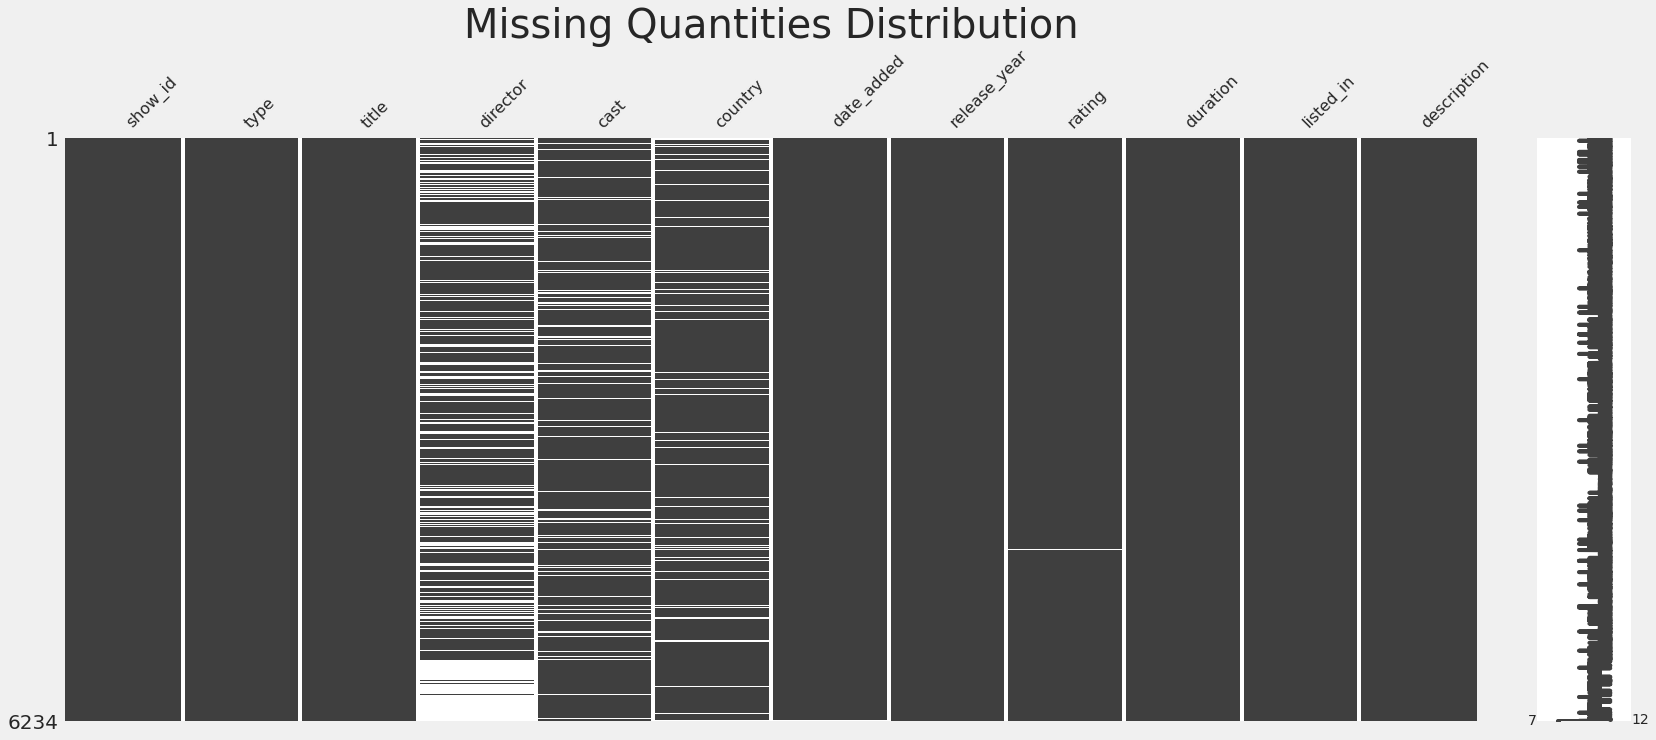

In [8]:
msno.matrix(df)
plt.title("Missing Quantities Distribution", fontsize=40)
plt.show()

In [9]:
profile = pandas_profiling.ProfileReport(df)
profile

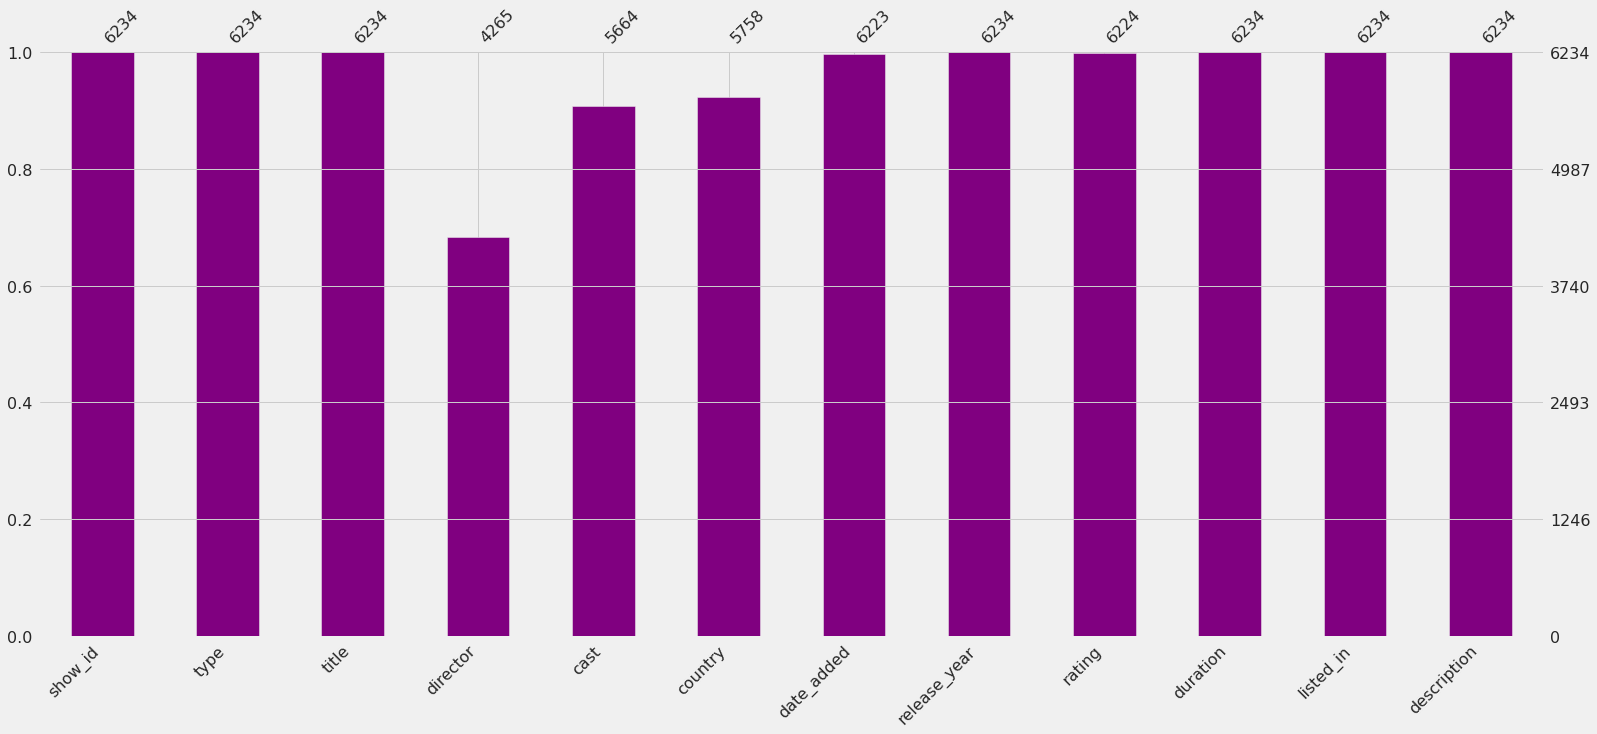

In [10]:
n = msno.bar(df,color='purple')

In [11]:
df['country'].value_counts()

United States                                            2032
India                                                     777
United Kingdom                                            348
Japan                                                     176
Canada                                                    141
                                                         ... 
South Africa, Germany, Netherlands, France                  1
Soviet Union, India                                         1
United States, United Kingdom, Denmark, Sweden              1
United States, Hungary                                      1
United Kingdom, United States, Greece, Italy, Germany       1
Name: country, Length: 554, dtype: int64

In [12]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
df['country'].replace(np.nan,"NA",inplace=True)
df['country'].value_counts()

United States                                            2032
India                                                     777
NA                                                        476
United Kingdom                                            348
Japan                                                     176
                                                         ... 
United States, Denmark                                      1
South Africa, Germany, Netherlands, France                  1
Soviet Union, India                                         1
United States, United Kingdom, Denmark, Sweden              1
United Kingdom, United States, Greece, Italy, Germany       1
Name: country, Length: 555, dtype: int64

In [14]:
df['date_added'].value_counts()

January 1, 2020      122
November 1, 2019      94
March 1, 2018         78
December 31, 2019     74
October 1, 2018       72
                    ... 
December 18, 2017      1
August 11, 2017        1
 July 2, 2019          1
December 19, 2018      1
 May 2, 2019           1
Name: date_added, Length: 1524, dtype: int64

In [15]:
netflix_date = df[['date_added']].replace(np.nan,'Not Added')
netflix_date["release_month"] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
netflix_date.head()

date_added release_month
0  September 9, 2019     September
1  September 9, 2016     September
2  September 8, 2018     September
3  September 8, 2018     September
4  September 8, 2017     September

In [16]:
netflix_date["release_month"].value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
Not           11
Name: release_month, dtype: int64

In [17]:
netflix_date['release_month'].replace('Not', 0,inplace=True)
netflix_date["release_month"].value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
0             11
Name: release_month, dtype: int64

In [18]:
netflix_date.drop("date_added",axis=1,inplace=True)
netflix_date.head()

release_month
0     September
1     September
2     September
3     September
4     September

In [19]:
netflix = pd.concat([df,netflix_date],axis=1)
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description release_month  
0  Before planning an awesome wedding for his gra...     September  
1  Jandino Asporaat riffs on the challenges of ra...     September  
2  With the help of three human allies, the Autob...     September  
3  When a prison ship crash unleashes hundreds of...     September  
4  When nerdy high schooler Dani finally attracts...     September

In [20]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month

netflix['season_count'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
netflix['duration'] = netflix.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09          2019   
1                            United Kingdom 2016-09-09          2016   
2                             United States 2018-09-08          2013   
3                             United States 2018-09-08          2016   
4                             United States 2017-09-08          2017   

     rating duration                           listed_in  \
0     TV-PG       90  Children & Family Movies, Comedies   
1     TV-MA       94                     Stand-Up Comedy   
2  TV-Y7-FV                                     Kids' TV   
3     TV-Y7                                     Kids' TV   
4     TV-14       99                            Comedies   

                                         description release_month  \
0  Before planning an awesome wedding for his gra...     September   
1  Jandino Asporaat riffs on the challenges of ra...     September   
2  With the help of three human allies, the Autob...     September   
3  When a prison ship crash unleashes hundreds of...     September   
4  When nerdy high schooler Dani finally attracts...     September   

   year_added  month_added season_count  
0      2019.0          9.0               
1      2016.0          9.0               
2      2018.0          9.0            1  
3      2018.0          9.0            1  
4      2017.0          9.0

In [21]:
netflix["rating"].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [22]:
netflix.isnull().sum()

show_id             0
type                0
title               0
director         1969
cast              570
country             0
date_added         11
release_year        0
rating             10
duration            0
listed_in           0
description         0
release_month       0
year_added         11
month_added        11
season_count        0
dtype: int64

In [23]:
netflix["rating"].replace(np.nan,"TV-MA",inplace=True)
netflix.isnull().sum()

show_id             0
type                0
title               0
director         1969
cast              570
country             0
date_added         11
release_year        0
rating              0
duration            0
listed_in           0
description         0
release_month       0
year_added         11
month_added        11
season_count        0
dtype: int64

In [24]:
netflix['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

In [25]:
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09          2019   
1                            United Kingdom 2016-09-09          2016   
2                             United States 2018-09-08          2013   
3                             United States 2018-09-08          2016   
4                             United States 2017-09-08          2017   

     rating duration                           listed_in  \
0     TV-PG       90  Children & Family Movies, Comedies   
1     TV-MA       94                     Stand-Up Comedy   
2  TV-Y7-FV                                     Kids' TV   
3     TV-Y7                                     Kids' TV   
4     TV-14       99                            Comedies   

                                         description release_month  \
0  Before planning an awesome wedding for his gra...     September   
1  Jandino Asporaat riffs on the challenges of ra...     September   
2  With the help of three human allies, the Autob...     September   
3  When a prison ship crash unleashes hundreds of...     September   
4  When nerdy high schooler Dani finally attracts...     September   

   year_added  month_added season_count  
0      2019.0          9.0               
1      2016.0          9.0               
2      2018.0          9.0            1  
3      2018.0          9.0            1  
4      2017.0          9.0

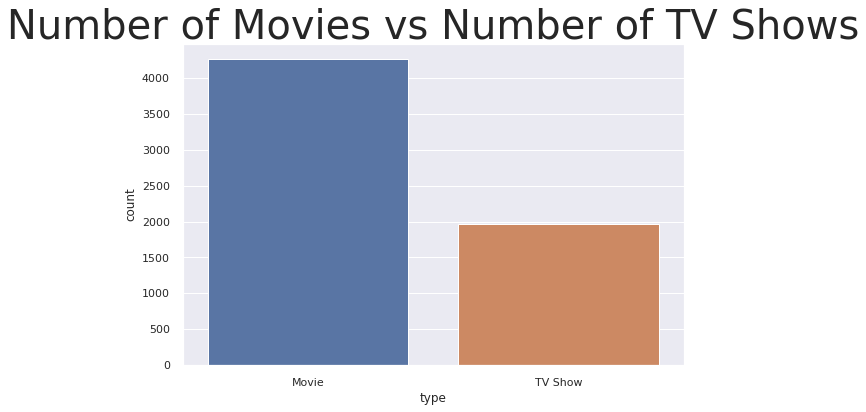

In [26]:
sns.set()
sns.countplot(x="type",data=netflix)
plt.title("Number of Movies vs Number of TV Shows", fontsize=40)
plt.show()

In [27]:
categ = netflix['type'].value_counts().to_frame().reset_index().rename(columns={'index':'type', 'type':'count'})
fig = go.Figure([go.Pie(labels=categ['type'], values=categ['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))])
fig = fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15, insidetextorientation='radial')
fig = fig.update_layout(title='Types of Content on Netflix', title_x=0.5)
fig.show()

In [28]:
labels = netflix['type'].value_counts().index
values = netflix['type'].value_counts().values
title = 'Content Type'
trace = go.Pie(labels = labels,
               values = values,
               title = title,
               hoverinfo = 'percent+value',
               textinfo = 'percent',
               textposition = 'inside',
               hole = 0.7,
               showlegend = True,
               marker = dict(colors = ['cyan','gold'],
                             line = dict(color="#000000",
                                        width = 2),
                            )
              )
fig = go.Figure(data=[trace])
fig.show()

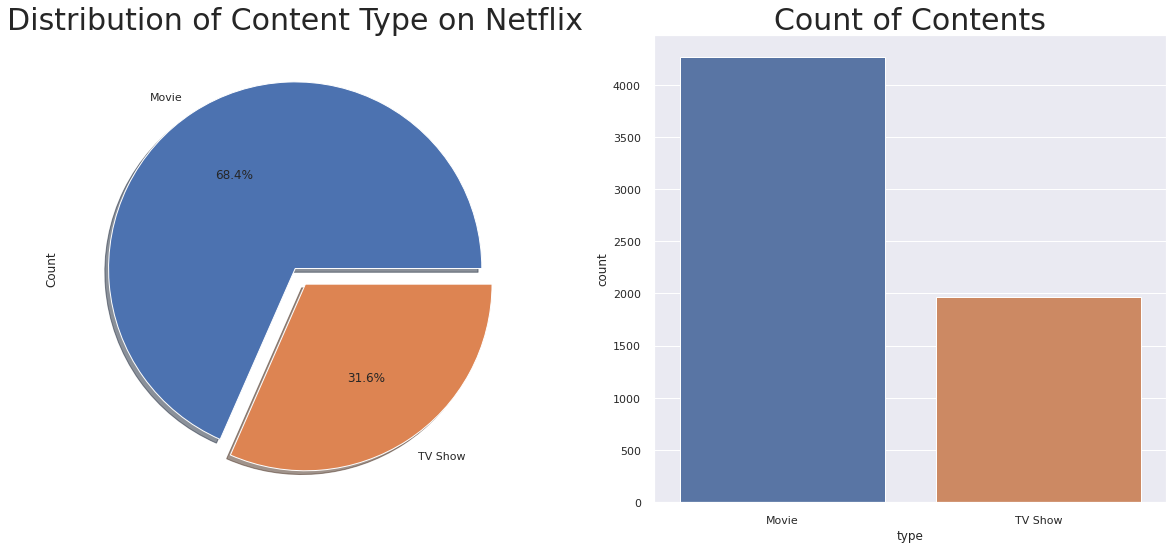

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
netflix['type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of Content Type on Netflix', fontsize=30)
ax[0].set_ylabel('Count')
sns.countplot('type',data=netflix,ax=ax[1],order=netflix['type'].value_counts().index)
ax[1].set_title('Count of Contents', fontsize=30)
plt.show()

In [30]:
movies = netflix[netflix['type']=='Movie']
shows = netflix[netflix['type']=='TV Show']

movies.head()

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   
4  80125979  Movie                             #realityhigh   
6  70304989  Movie                                 Automata   
7  80164077  Movie       Fabrizio Copano: Solo pienso en mi   

                          director  \
0         Richard Finn, Tim Maltby   
1                              NaN   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   

                                    country date_added  release_year rating  \
0  United States, India, South Korea, China 2019-09-09          2019  TV-PG   
1                            United Kingdom 2016-09-09          2016  TV-MA   
4                             United States 2017-09-08          2017  TV-14   
6    Bulgaria, United States, Spain, Canada 2017-09-08          2014      R   
7                                     Chile 2017-09-08          2017  TV-MA   

  duration                                          listed_in  \
0       90                 Children & Family Movies, Comedies   
1       94                                    Stand-Up Comedy   
4       99                                           Comedies   
6      110  International Movies, Sci-Fi & Fantasy, Thrillers   
7       60                                    Stand-Up Comedy   

                                         description release_month  \
0  Before planning an awesome wedding for his gra...     September   
1  Jandino Asporaat riffs on the challenges of ra...     September   
4  When nerdy high schooler Dani finally attracts...     September   
6  In a dystopian future, an insurance adjuster f...     September   
7  Fabrizio Copano takes audience participation t...     September   

   year_added  month_added season_count  
0      2019.0          9.0               
1      2016.0          9.0               
4      2017.0          9.0               
6      2017.0          9.0               
7      2017.0          9.0

In [31]:
shows.head()

show_id     type                             title director  \
2   70234439  TV Show                Transformers Prime      NaN   
3   80058654  TV Show  Transformers: Robots in Disguise      NaN   
5   80163890  TV Show                           Apaches      NaN   
8   80117902  TV Show                      Fire Chasers      NaN   
26  80244601  TV Show                   Castle of Stars      NaN   

                                                 cast        country  \
2   Peter Cullen, Sumalee Montano, Frank Welker, J...  United States   
3   Will Friedle, Darren Criss, Constance Zimmer, ...  United States   
5   Alberto Ammann, Eloy Azorín, Verónica Echegui,...          Spain   
8                                                 NaN  United States   
26  Chaiyapol Pupart, Jintanutda Lummakanon, Worra...             NA   

   date_added  release_year    rating duration  \
2  2018-09-08          2013  TV-Y7-FV            
3  2018-09-08          2016     TV-Y7            
5  2017-09-08          2016     TV-MA            
8  2017-09-08          2017     TV-MA            
26 2018-09-07          2015     TV-14            

                                            listed_in  \
2                                            Kids' TV   
3                                            Kids' TV   
5   Crime TV Shows, International TV Shows, Spanis...   
8                     Docuseries, Science & Nature TV   
26  International TV Shows, Romantic TV Shows, TV ...   

                                          description release_month  \
2   With the help of three human allies, the Autob...     September   
3   When a prison ship crash unleashes hundreds of...     September   
5   A young journalist is forced into a life of cr...     September   
8   As California's 2016 fire season rages, brave ...     September   
26  As four couples with different lifestyles go t...     September   

    year_added  month_added season_count  
2       2018.0          9.0            1  
3       2018.0          9.0            1  
5       2017.0          9.0            1  
8       2017.0          9.0            1  
26      2018.0          9.0            1

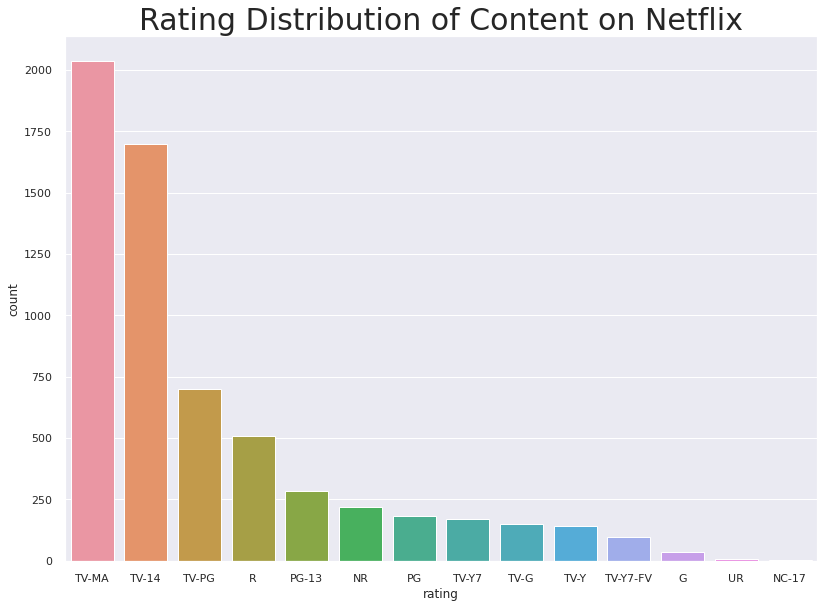

In [32]:
plt.figure(figsize=(12,9))
plt.title("Rating Distribution of Content on Netflix", fontsize=30)
sns.countplot(x="rating",data=netflix,order= netflix['rating'].value_counts().index[0:14])

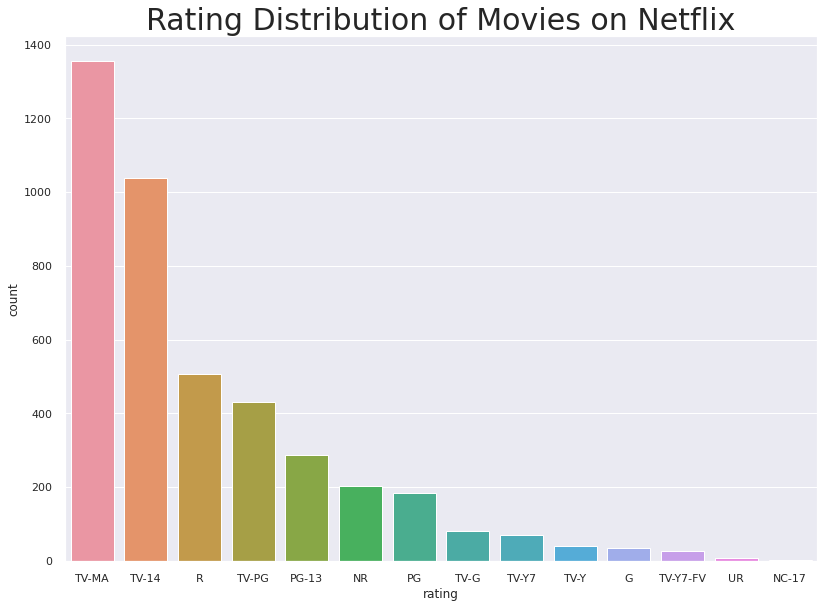

In [33]:
plt.figure(figsize=(12,9))
plt.title("Rating Distribution of Movies on Netflix", fontsize=30)
sns.countplot(x="rating",data=movies,order= movies['rating'].value_counts().index[0:14])

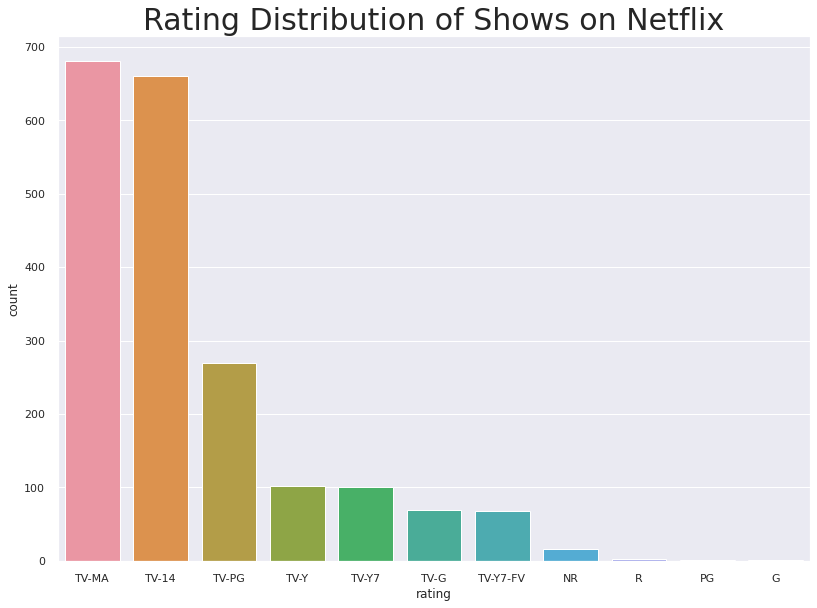

In [34]:
plt.figure(figsize=(12,9))
plt.title("Rating Distribution of Shows on Netflix", fontsize=30)
sns.countplot(x="rating",data=shows,order= shows['rating'].value_counts().index[0:14])

In [35]:
fig = px.pie(netflix,values = netflix['rating'].value_counts()[:10],names = netflix['rating'].value_counts()[:10].index,labels= netflix['rating'].value_counts()[:10].index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.update_layout(title='Rating Distribution of Content on Netflix', title_x=0.5)
fig.show()

In [36]:
fig = px.pie(movies,values = movies['rating'].value_counts()[:10],names = movies['rating'].value_counts()[:10].index,labels= movies['rating'].value_counts()[:10].index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.update_layout(title='Rating Distribution of Movies on Netflix', title_x=0.5)
fig.show()

In [37]:
fig = px.pie(shows,values = shows['rating'].value_counts()[:10],names = shows['rating'].value_counts()[:10].index,labels= shows['rating'].value_counts()[:10].index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.update_layout(title='Rating Distribution of Shows on Netflix', title_x=0.5)
fig.show()

In [38]:
r = netflix['rating'].value_counts()[:15].to_dict()
data = dict(
    count = r.values(),
    rating = r.keys())
fig = px.funnel(data, x='count', y='rating')
fig.update_layout(title='Count of Content Ratings on Netflix', title_x=0.5)
fig.show()

In [39]:
r = movies['rating'].value_counts()[:15].to_dict()
data = dict(
    count = r.values(),
    rating = r.keys())
fig = px.funnel(data, x='count', y='rating')
fig.update_layout(title='Count of Movie Ratings on Netflix', title_x=0.5)
fig.show()

In [40]:
r = shows['rating'].value_counts()[:15].to_dict()
data = dict(
    count = r.values(),
    rating = r.keys())
fig = px.funnel(data, x='count', y='rating')
fig.update_layout(title='Count of Show Ratings on Netflix', title_x=0.5)
fig.show()

In [41]:
movies_rating = movies['rating'].value_counts().reset_index()
shows_rating = shows['rating'].value_counts().reset_index()

trace1 = go.Bar(x = movies_rating['index'],
                y = movies_rating['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

trace2 = go.Bar(x = shows_rating['index'],
                y = shows_rating['rating'],
                name = "TV Shows",
                marker = dict(color = 'rgb(26, 118, 255)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

layout = go.Layout(template='plotly_dark', title='Rating by Content Type', xaxis=dict(title='Rating'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

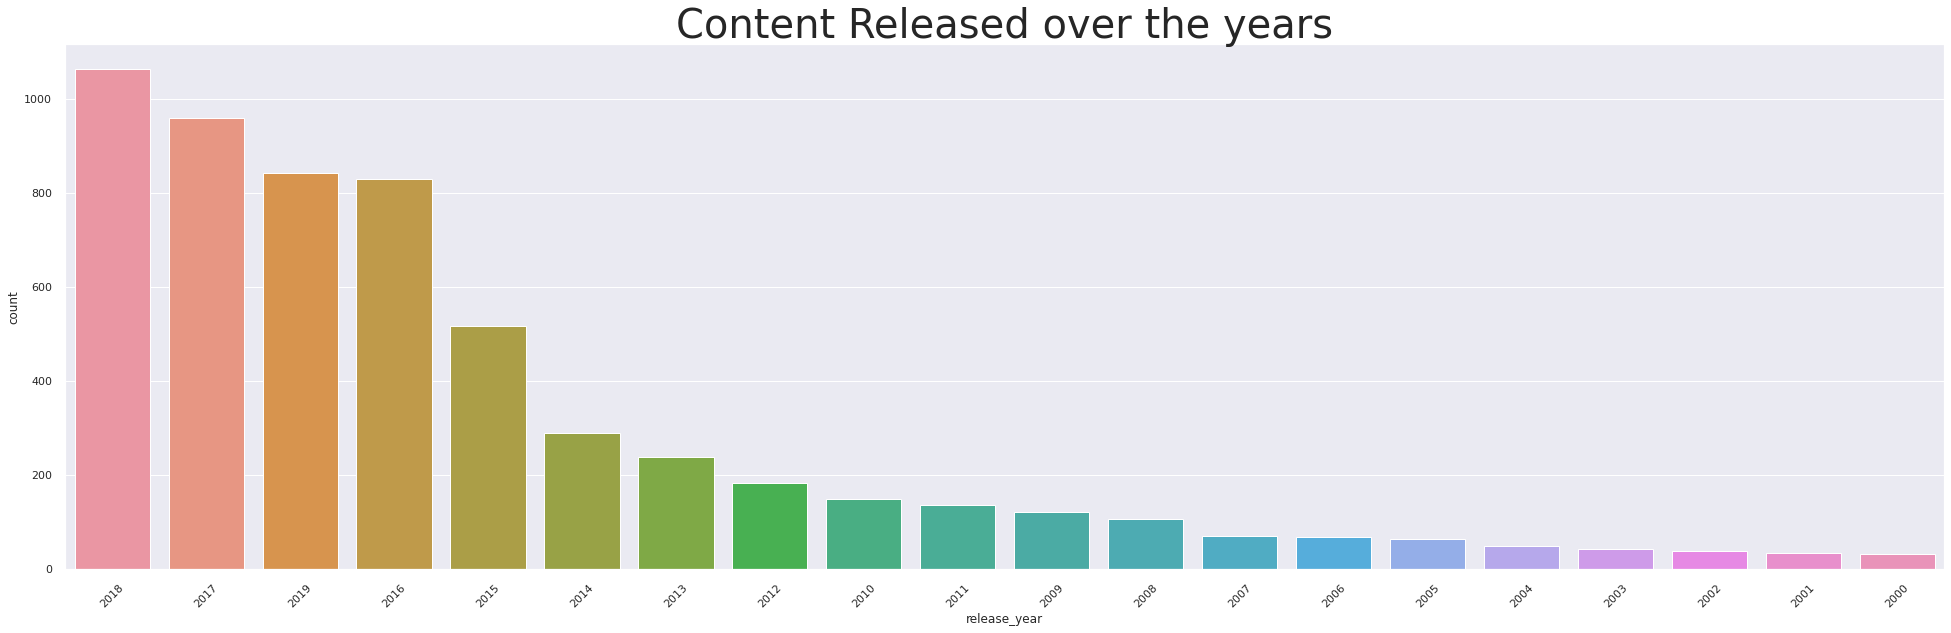

In [42]:
sns.set()
plt.figure(figsize=(30,9))
sns.countplot(x="release_year",data= netflix,order = netflix['release_year'].value_counts().index[0:20])
plt.title("Content Released over the years", fontsize=40)
plt.xticks(rotation=45)
plt.show()

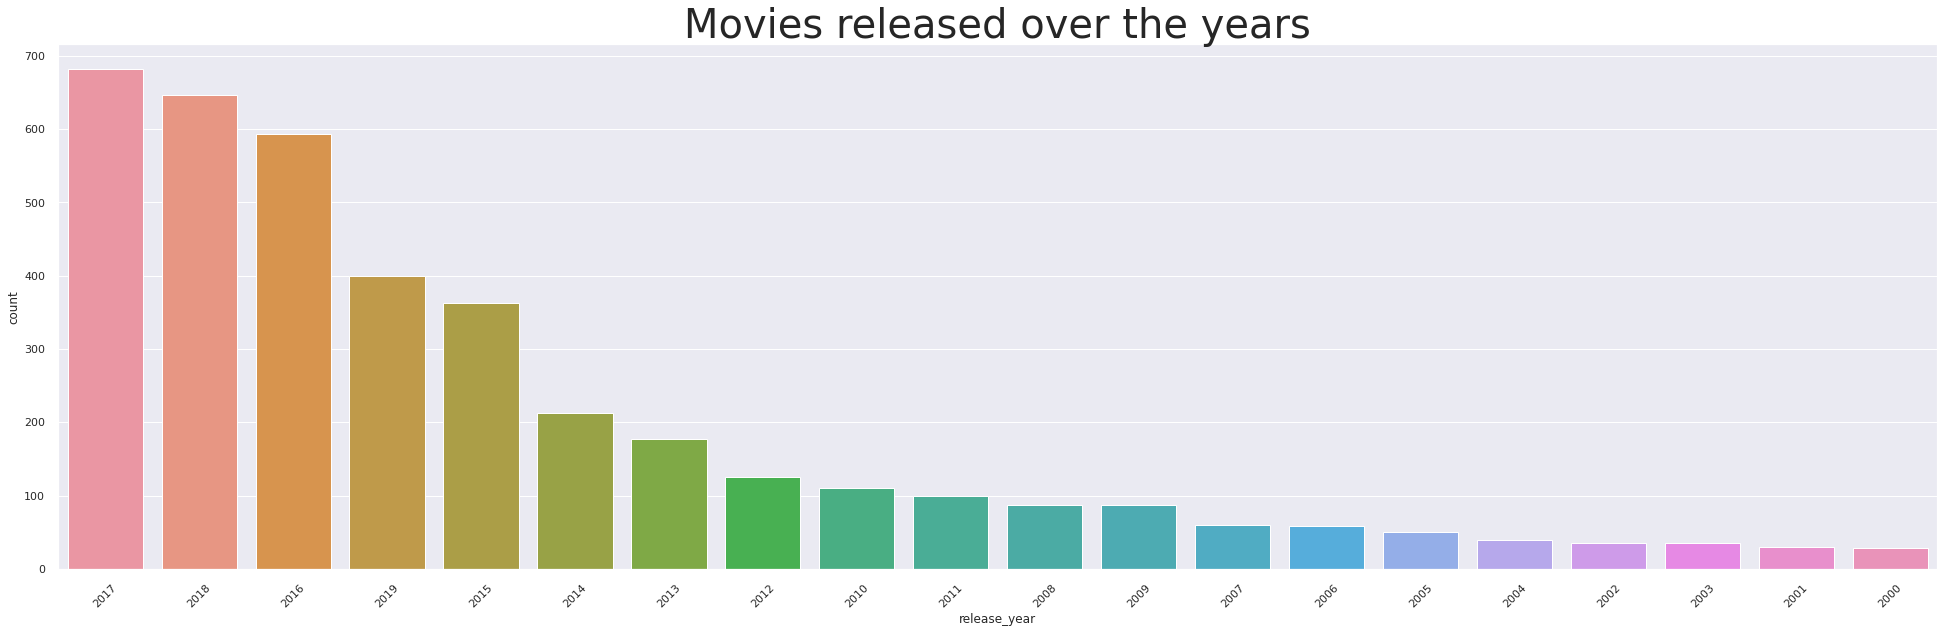

In [43]:
sns.set()
plt.figure(figsize=(30,9))
sns.countplot(x="release_year",data= movies,order = movies['release_year'].value_counts().index[0:20])
plt.title("Movies released over the years", fontsize=40)
plt.xticks(rotation=45)
plt.show()

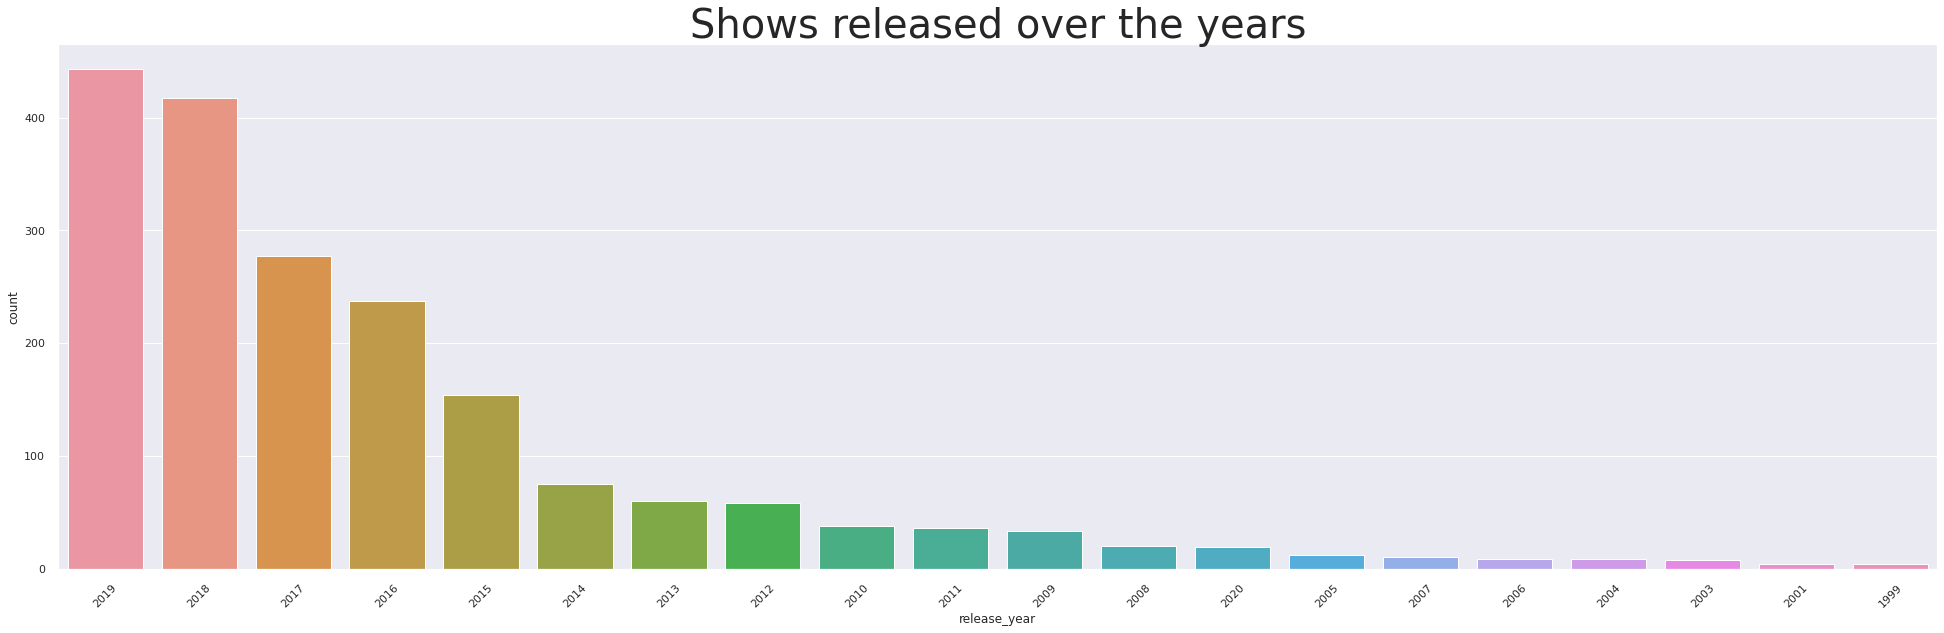

In [44]:
sns.set()
plt.figure(figsize=(30,9))
sns.countplot(x="release_year",data= shows,order = shows['release_year'].value_counts().index[0:20])
plt.title("Shows released over the years", fontsize=40)
plt.xticks(rotation=45)
plt.show()

In [45]:
fig = px.pie(netflix,values = netflix['release_year'].value_counts()[:10],names = netflix['release_year'].value_counts()[:10].index,labels= netflix['release_year'].value_counts()[:10].index)
fig.update_layout(title="Pie Chart for Distribution of Content based on Year Released")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [46]:
fig = px.pie(movies,values = movies['release_year'].value_counts()[:10],names = movies['release_year'].value_counts()[:10].index,labels= movies['release_year'].value_counts()[:10].index)
fig.update_layout(title="Pie Chart for Distribution of Movies based on Year Released")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [47]:
fig = px.pie(shows,values = shows['release_year'].value_counts()[:10],names = shows['release_year'].value_counts()[:10].index,labels= shows['release_year'].value_counts()[:10].index)
fig.update_layout(title="Pie Chart for Distribution of Shows based on Year Released")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [48]:
r = netflix['release_year'].value_counts()[:15].to_dict()
data = dict(
    count = r.values(),
    year = r.keys())
fig = px.funnel(data, x='year', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Content based on Year Released")
fig.show()

In [49]:
r = movies['release_year'].value_counts()[:15].to_dict()
data = dict(
    count = r.values(),
    year = r.keys())
fig = px.funnel(data, x='year', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Movies based on Year Released")
fig.show()

In [50]:
r = shows['release_year'].value_counts()[:15].to_dict()
data = dict(
    count = r.values(),
    year = r.keys())
fig = px.funnel(data, x='year', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Shows based on Year Released")
fig.show()

In [51]:
content = netflix['release_year'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['release_year'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Content Release over the years', xaxis=dict(title='Year'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [52]:
content = movies['release_year'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['release_year'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Movies Release over the years', xaxis=dict(title='Year'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [53]:
content = shows['release_year'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['release_year'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Shows Release over the years', xaxis=dict(title='Year'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [54]:
movies_release = movies['release_year'].value_counts().reset_index()
shows_release = shows['release_year'].value_counts().reset_index()

trace1 = go.Bar(x = movies_release['index'],
                y = movies_release['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

trace2 = go.Bar(x = shows_release['index'],
                y = shows_release['release_year'],
                name = "TV Shows",
                marker = dict(color = 'rgb(26, 118, 255)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

layout = go.Layout(template='plotly_dark', title='Release Years by Content Type', xaxis=dict(title='Years'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

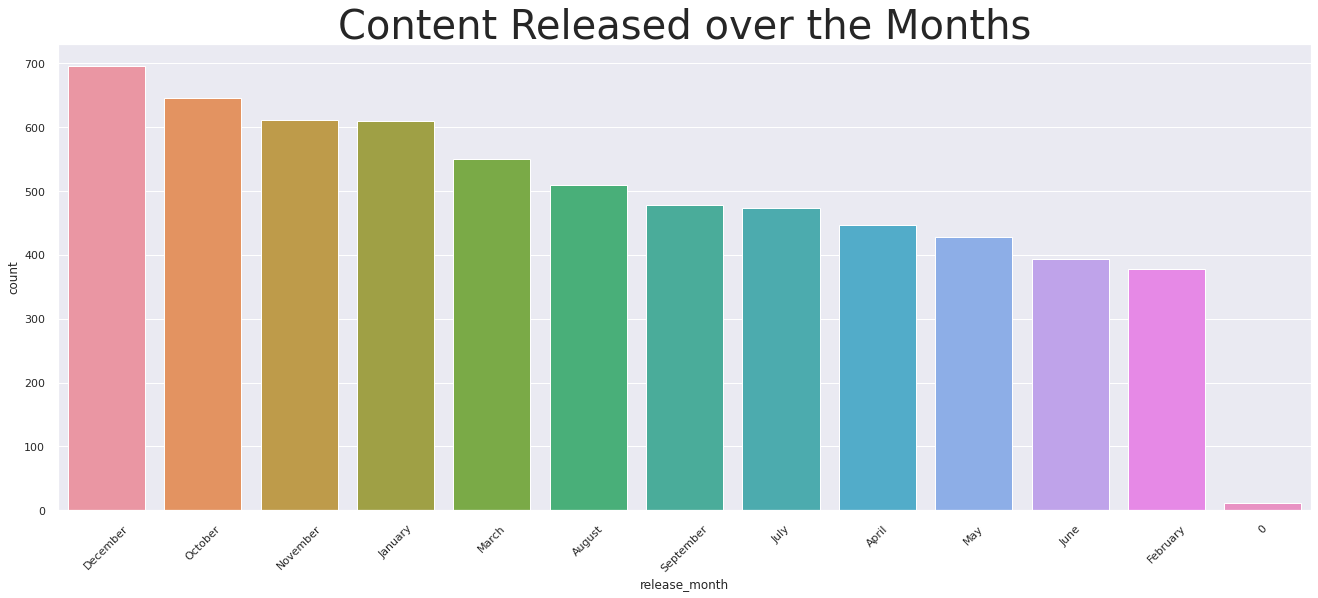

In [55]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="release_month",data= netflix,order = netflix['release_month'].value_counts().index)
plt.title("Content Released over the Months", fontsize=40)
plt.xticks(rotation=45)
plt.show()

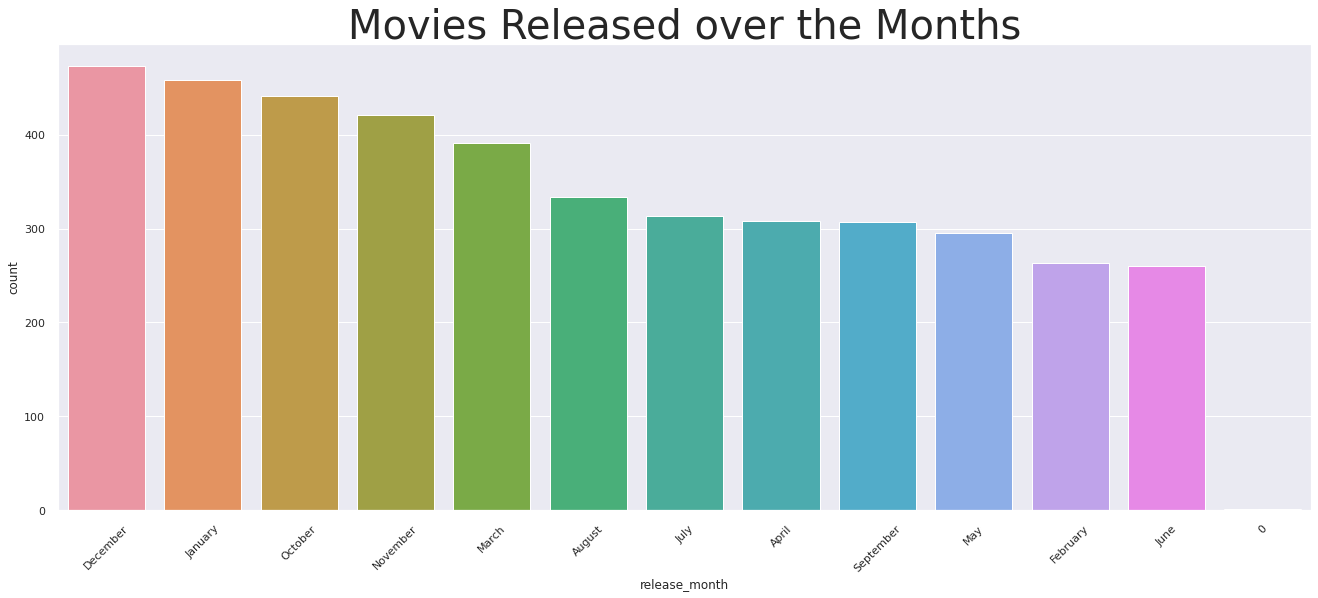

In [56]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="release_month",data= movies,order = movies['release_month'].value_counts().index)
plt.title("Movies Released over the Months", fontsize=40)
plt.xticks(rotation=45)
plt.show()

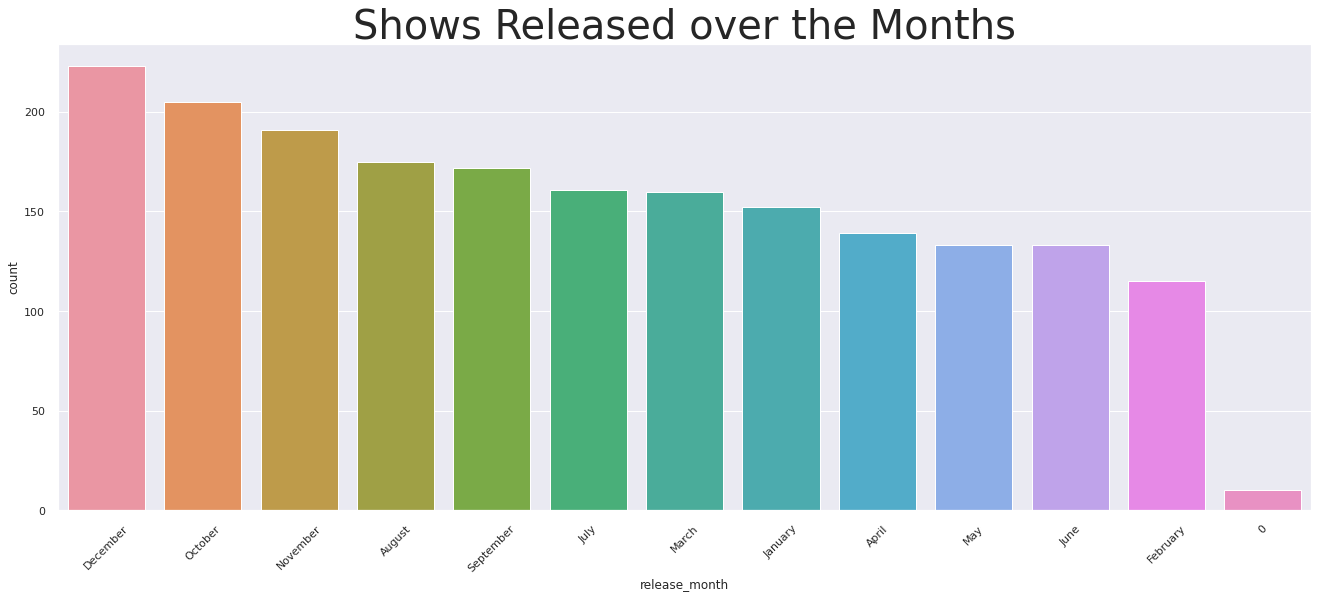

In [57]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="release_month",data= shows,order = shows['release_month'].value_counts().index)
plt.title("Shows Released over the Months", fontsize=40)
plt.xticks(rotation=45)
plt.show()

In [58]:
fig = px.pie(netflix,values = netflix['release_month'].value_counts(),names = netflix['release_month'].value_counts().index,labels= netflix['release_month'].value_counts().index)
fig.update_layout(title="Pie Chart for Distribution of Content based on Month Released")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [59]:
fig = px.pie(movies,values = movies['release_month'].value_counts(),names = movies['release_month'].value_counts().index,labels= movies['release_month'].value_counts().index)
fig.update_layout(title="Pie Chart for Distribution of Movies based on Month Released")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [60]:
fig = px.pie(shows,values = shows['release_month'].value_counts(),names = shows['release_month'].value_counts().index,labels= shows['release_month'].value_counts().index)
fig.update_layout(title="Pie Chart for Distribution of Shows based on Month Released")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [61]:
r = netflix['release_month'].value_counts().to_dict()
data = dict(
    count = r.values(),
    month = r.keys())
fig = px.funnel(data, x='month', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Content based on Month Released")
fig.show()

In [62]:
r = movies['release_month'].value_counts().to_dict()
data = dict(
    count = r.values(),
    month = r.keys())
fig = px.funnel(data, x='month', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Movies based on Month Released")
fig.show()

In [63]:
r = shows['release_month'].value_counts().to_dict()
data = dict(
    count = r.values(),
    month = r.keys())
fig = px.funnel(data, x='month', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Shows based on Month Released")
fig.show()

In [64]:
content = netflix['release_month'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['release_month'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Content Release over the months', xaxis=dict(title='Months'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [65]:
content = movies['release_month'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['release_month'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Movies Release over the months', xaxis=dict(title='Months'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [66]:
content = shows['release_month'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['release_month'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Shows Release over the months', xaxis=dict(title='Months'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [67]:
movies_release = movies['release_month'].value_counts().reset_index()
shows_release = shows['release_month'].value_counts().reset_index()

trace1 = go.Bar(x = movies_release['index'],
                y = movies_release['release_month'],
                name = "Movies",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

trace2 = go.Bar(x = shows_release['index'],
                y = shows_release['release_month'],
                name = "TV Shows",
                marker = dict(color = 'rgb(26, 118, 255)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

layout = go.Layout(template='plotly_dark', title='Release Months by Content Type', xaxis=dict(title='Months'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

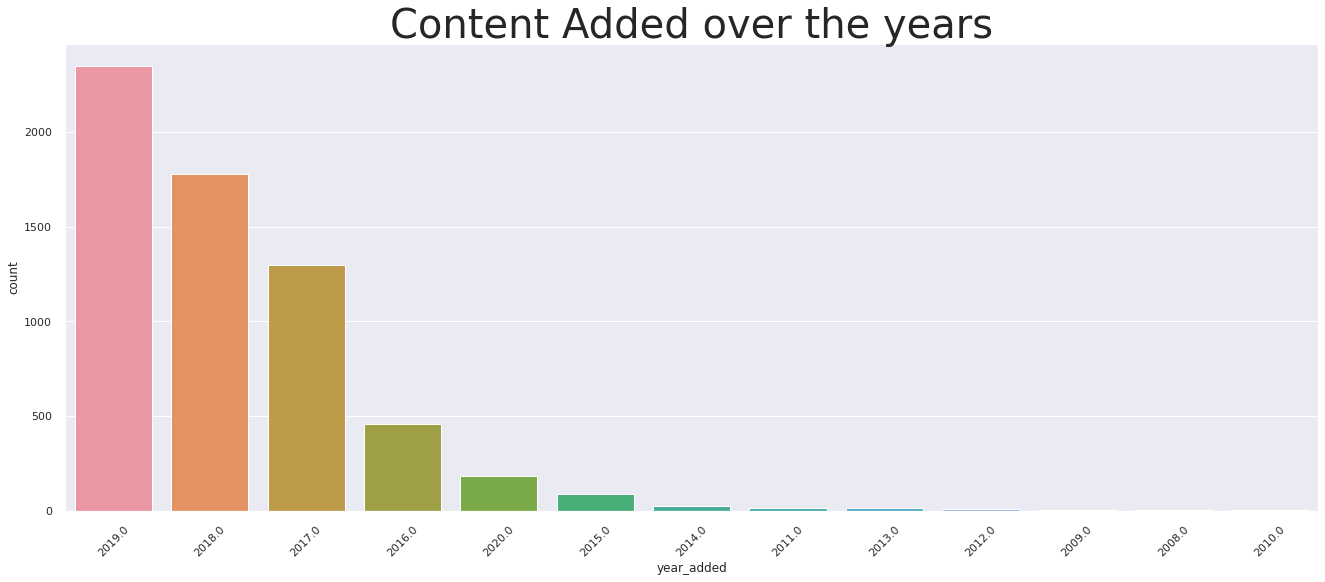

In [68]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="year_added",data= netflix,order = netflix['year_added'].value_counts().index[0:20])
plt.title("Content Added over the years", fontsize=40)
plt.xticks(rotation=45)
plt.show()

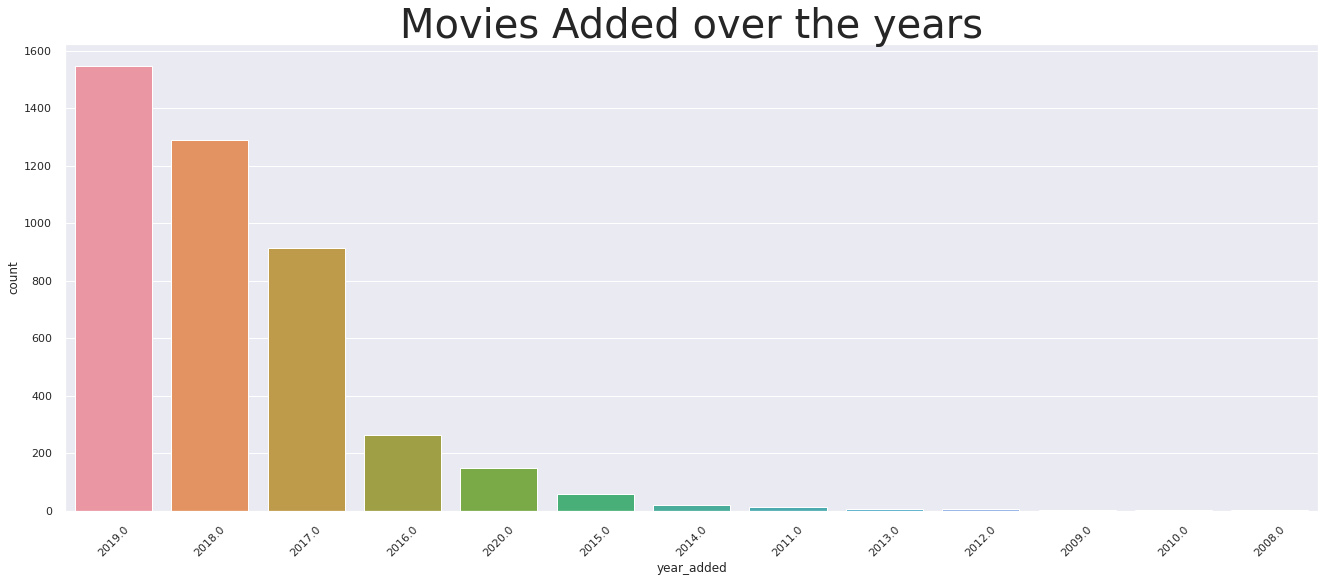

In [69]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="year_added",data= movies,order = movies['year_added'].value_counts().index[0:20])
plt.title("Movies Added over the years", fontsize=40)
plt.xticks(rotation=45)
plt.show()

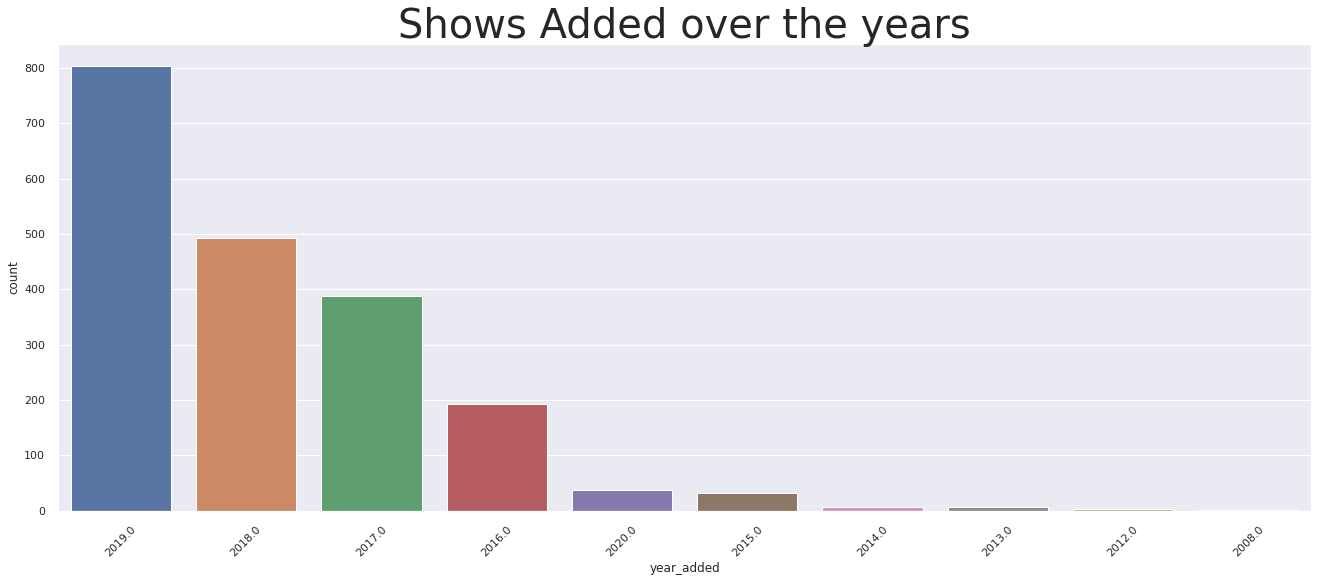

In [70]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="year_added",data= shows,order = shows['year_added'].value_counts().index[0:20])
plt.title("Shows Added over the years", fontsize=40)
plt.xticks(rotation=45)
plt.show()

In [71]:
fig = px.pie(netflix,values = netflix['year_added'].value_counts(),names = netflix['year_added'].value_counts().index,labels= netflix['year_added'].value_counts().index)
fig.update_layout(title="Pie Chart for Distribution of Content based on Year Added")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [72]:
fig = px.pie(movies,values = movies['year_added'].value_counts(),names = movies['year_added'].value_counts().index,labels= movies['year_added'].value_counts().index)
fig.update_layout(title="Pie Chart for Distribution of Movies based on Year Added")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [73]:
fig = px.pie(shows,values = shows['year_added'].value_counts(),names = shows['year_added'].value_counts().index,labels= shows['year_added'].value_counts().index)
fig.update_layout(title="Pie Chart for Distribution of Shows based on Year Added")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [74]:
r = netflix['year_added'].value_counts().to_dict()
data = dict(
    count = r.values(),
    year = r.keys())
fig = px.funnel(data, x='year', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Content based on Year Added")
fig.show()

In [75]:
r = movies['year_added'].value_counts().to_dict()
data = dict(
    count = r.values(),
    year = r.keys())
fig = px.funnel(data, x='year', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Movies based on Year Added")
fig.show()

In [76]:
r = shows['year_added'].value_counts().to_dict()
data = dict(
    count = r.values(),
    year = r.keys())
fig = px.funnel(data, x='year', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Shows based on Year Added")
fig.show()

In [77]:
content = netflix['year_added'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['year_added'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Content Added over the years', xaxis=dict(title='Year'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [78]:
content = movies['year_added'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['year_added'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Movies Added over the years', xaxis=dict(title='Year'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [79]:
content = shows['year_added'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['year_added'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Shows Added over the years', xaxis=dict(title='Year'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [80]:
movies_release = movies['year_added'].value_counts().reset_index()
shows_release = shows['year_added'].value_counts().reset_index()

trace1 = go.Bar(x = movies_release['index'],
                y = movies_release['year_added'],
                name = "Movies",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

trace2 = go.Bar(x = shows_release['index'],
                y = shows_release['year_added'],
                name = "TV Shows",
                marker = dict(color = 'rgb(26, 118, 255)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

layout = go.Layout(template='plotly_dark', title='Year Added by Content Type', xaxis=dict(title='Year'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

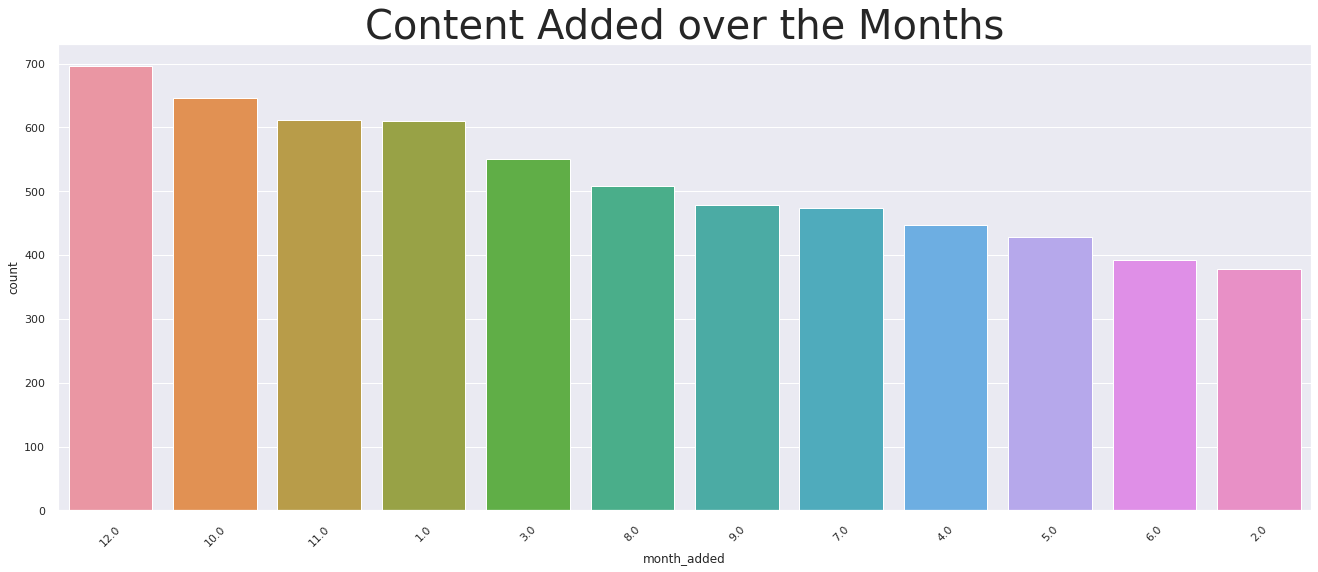

In [81]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="month_added",data= netflix,order = netflix['month_added'].value_counts().index)
plt.title("Content Added over the Months", fontsize=40)
plt.xticks(rotation=45)
plt.show()

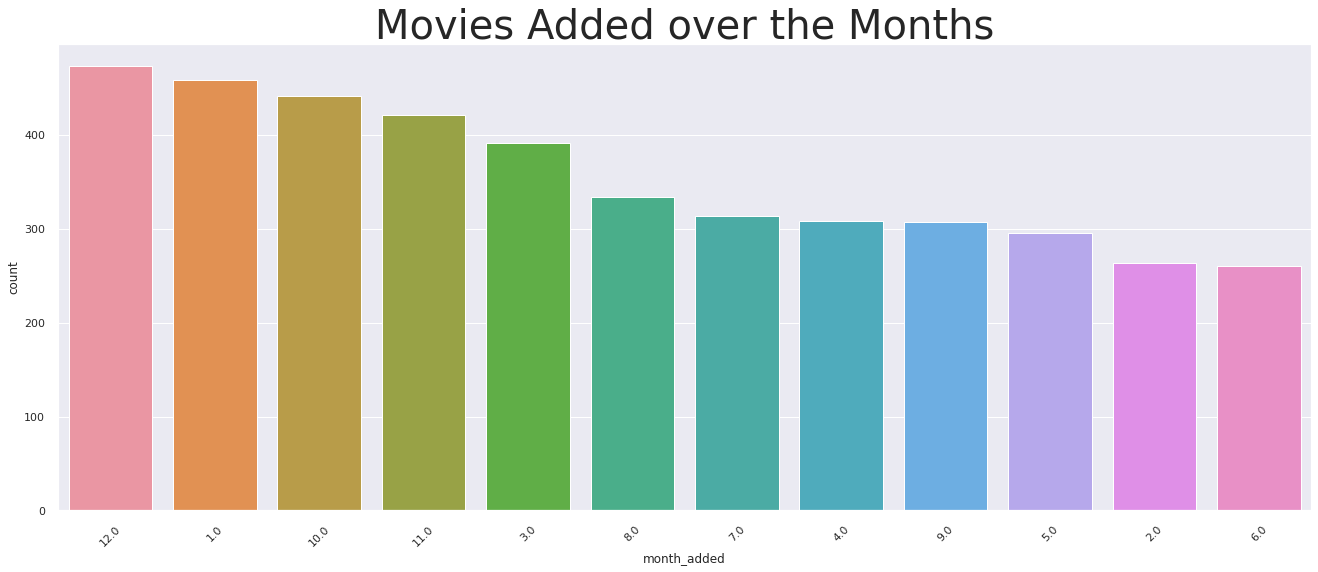

In [82]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="month_added",data= movies,order = movies['month_added'].value_counts().index)
plt.title("Movies Added over the Months", fontsize=40)
plt.xticks(rotation=45)
plt.show()

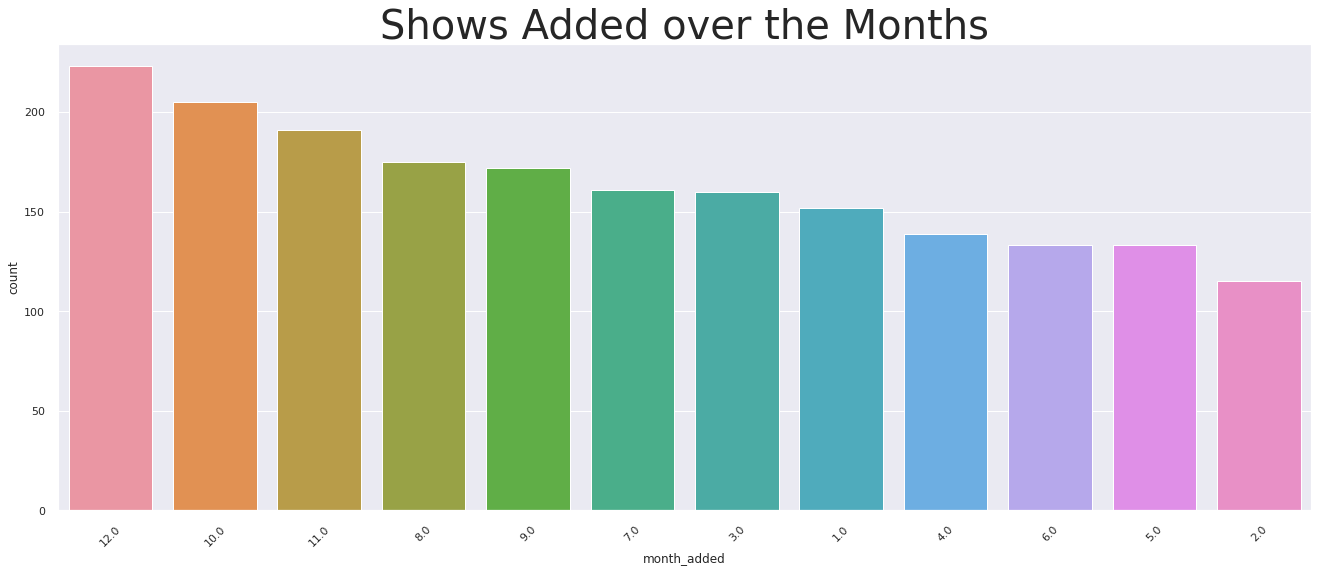

In [83]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="month_added",data= shows,order = shows['month_added'].value_counts().index)
plt.title("Shows Added over the Months", fontsize=40)
plt.xticks(rotation=45)
plt.show()

In [84]:
fig = px.pie(netflix,values = netflix['month_added'].value_counts(),names = netflix['month_added'].value_counts().index,labels= netflix['month_added'].value_counts().index)
fig.update_layout(title="Pie Chart for Distribution of Content based on Month Added")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [85]:
fig = px.pie(movies,values = movies['month_added'].value_counts(),names = movies['month_added'].value_counts().index,labels= movies['month_added'].value_counts().index)
fig.update_layout(title="Pie Chart for Distribution of Movies based on Month Added")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [86]:
fig = px.pie(shows,values = shows['month_added'].value_counts(),names = shows['month_added'].value_counts().index,labels= shows['month_added'].value_counts().index)
fig.update_layout(title="Pie Chart for Distribution of Shows based on Month Added")
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [87]:
r = netflix['month_added'].value_counts().to_dict()
data = dict(
    count = r.values(),
    month = r.keys())
fig = px.funnel(data, x='month', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Content based on Month Added")
fig.show()

In [88]:
r = movies['month_added'].value_counts().to_dict()
data = dict(
    count = r.values(),
    month = r.keys())
fig = px.funnel(data, x='month', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Movies based on Month Added")
fig.show()

In [89]:
r = shows['month_added'].value_counts().to_dict()
data = dict(
    count = r.values(),
    month = r.keys())
fig = px.funnel(data, x='month', y='count')
fig.update_layout(title="Funnel Plot for Distribution of Shows based on Month Added")
fig.show()

In [90]:
content = netflix['month_added'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['month_added'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Content Added over the months', xaxis=dict(title='Month'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [91]:
content = movies['month_added'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['month_added'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Movies Added over the months', xaxis=dict(title='Month'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [92]:
content = shows['month_added'].value_counts().reset_index()
trace1 = go.Bar(x = content['index'],
                y = content['month_added'],
                marker = dict(color='rgb(255, 165, 0)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )
layout = go.Layout(template='plotly_dark', title='Shows Added over the months', xaxis=dict(title='Month'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1], layout=layout)
fig.show()

In [93]:
movies_added = movies['month_added'].value_counts().reset_index()
shows_added = shows['month_added'].value_counts().reset_index()

trace1 = go.Bar(x = movies_added['index'],
                y = movies_added['month_added'],
                name = "Movies",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

trace2 = go.Bar(x = shows_added['index'],
                y = shows_added['month_added'],
                name = "TV Shows",
                marker = dict(color = 'rgb(26, 118, 255)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

layout = go.Layout(template='plotly_dark', title='Months Added by Content Type', xaxis=dict(title='Month'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

In [94]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

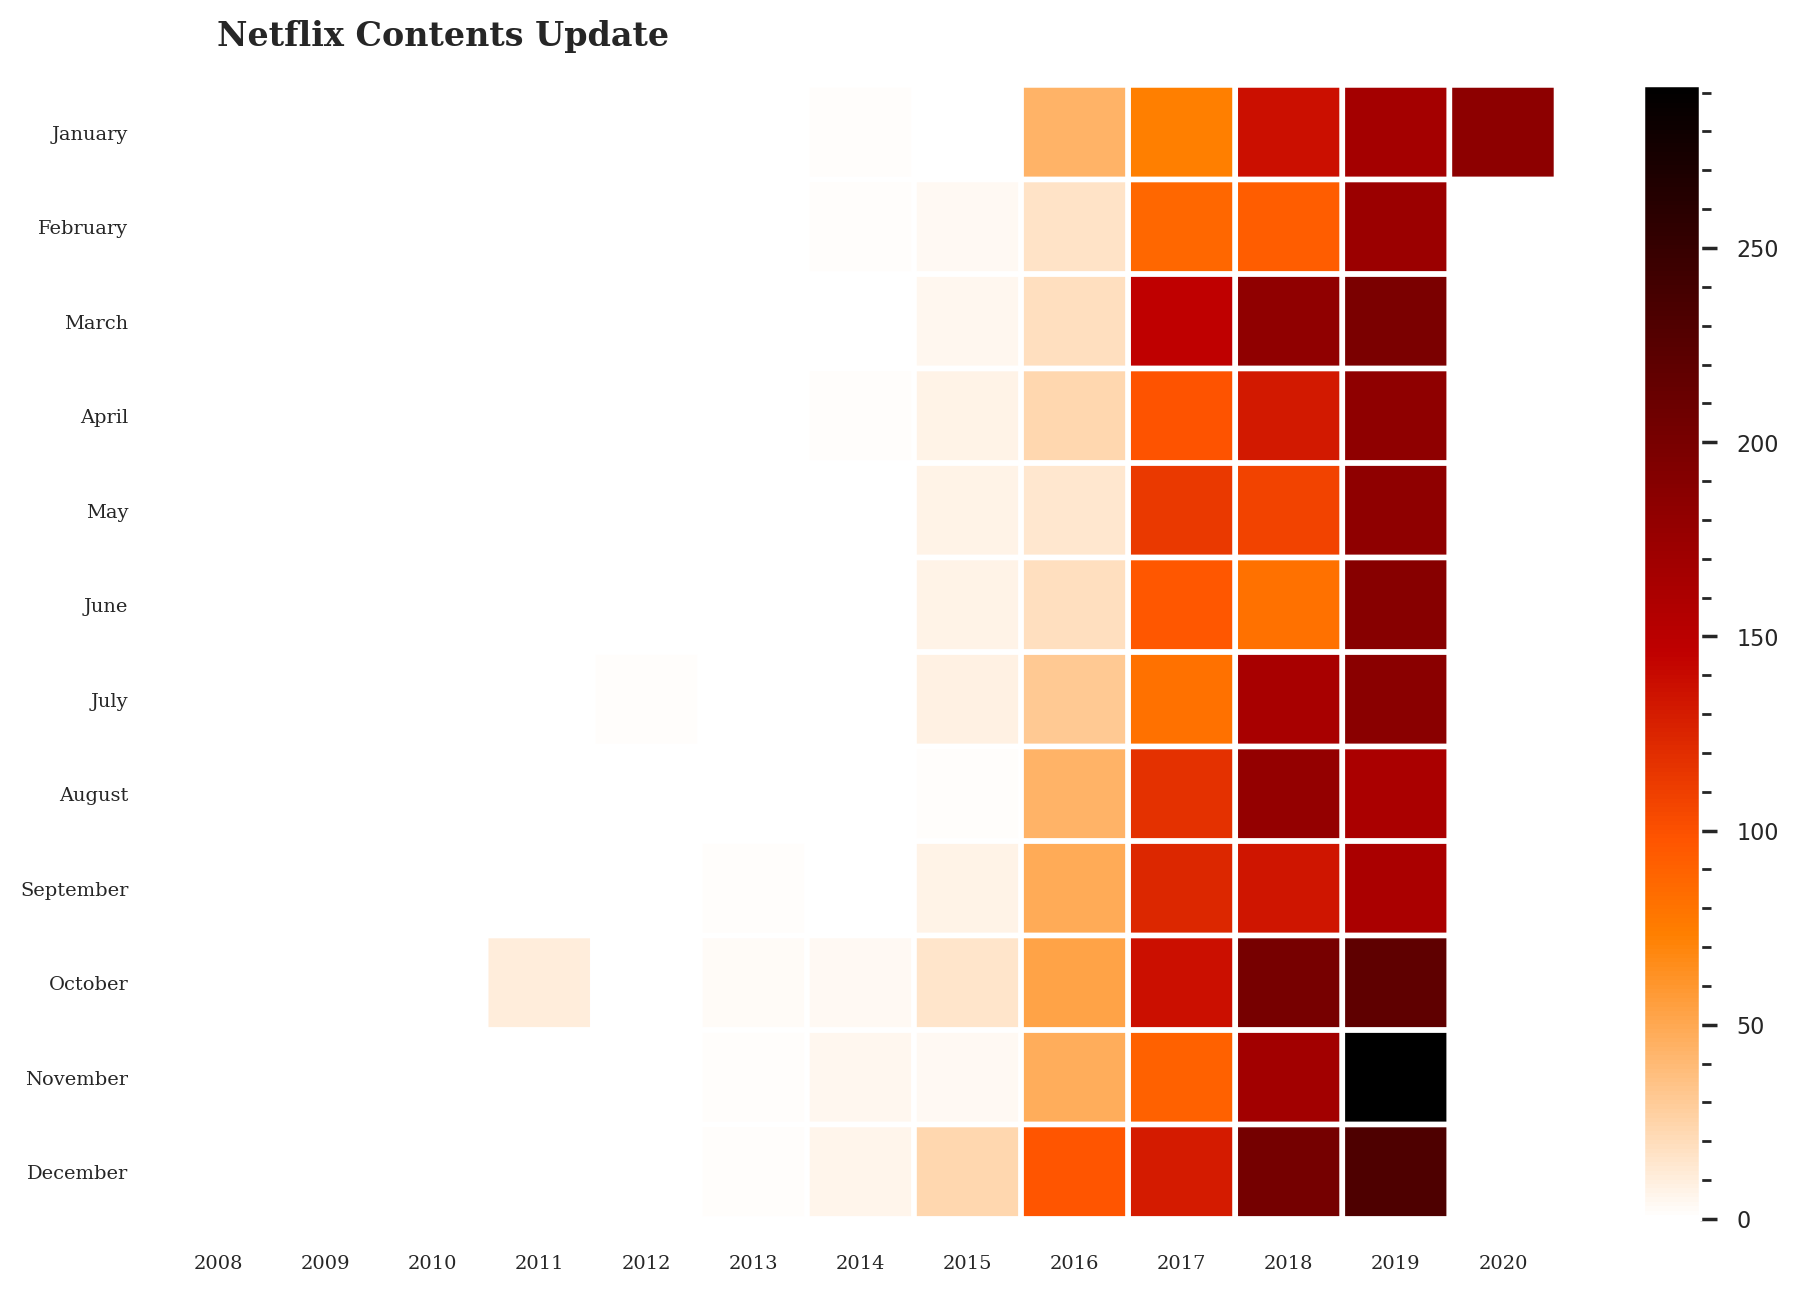

In [95]:
shows_date = df[['date_added']].dropna()
shows_date['year'] = shows_date['date_added'].apply(lambda x: x.split(', ')[-1])
shows_date['month'] = shows_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
n = shows_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(n, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(n.columns), 1), n.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(n.index), 1), n.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

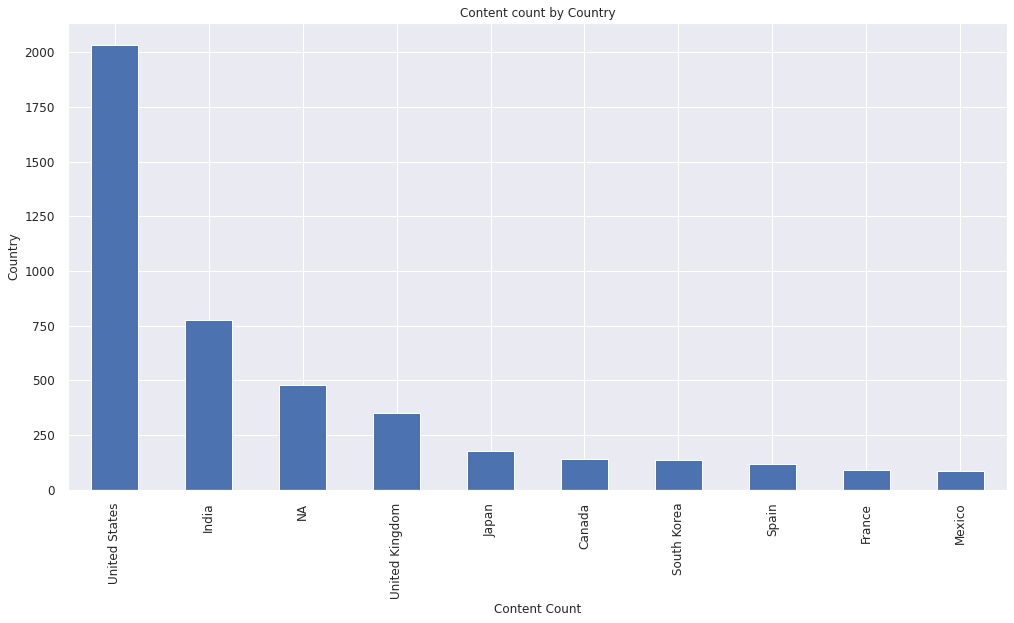

In [96]:
group_country_movies=netflix.groupby('country')['show_id'].count().sort_values(ascending=False).head(10);
plt.subplots(figsize=(15,8));
group_country_movies.plot(kind='bar',fontsize=12);
plt.xlabel('Content Count',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Content count by Country',fontsize=12)
plt.ioff()

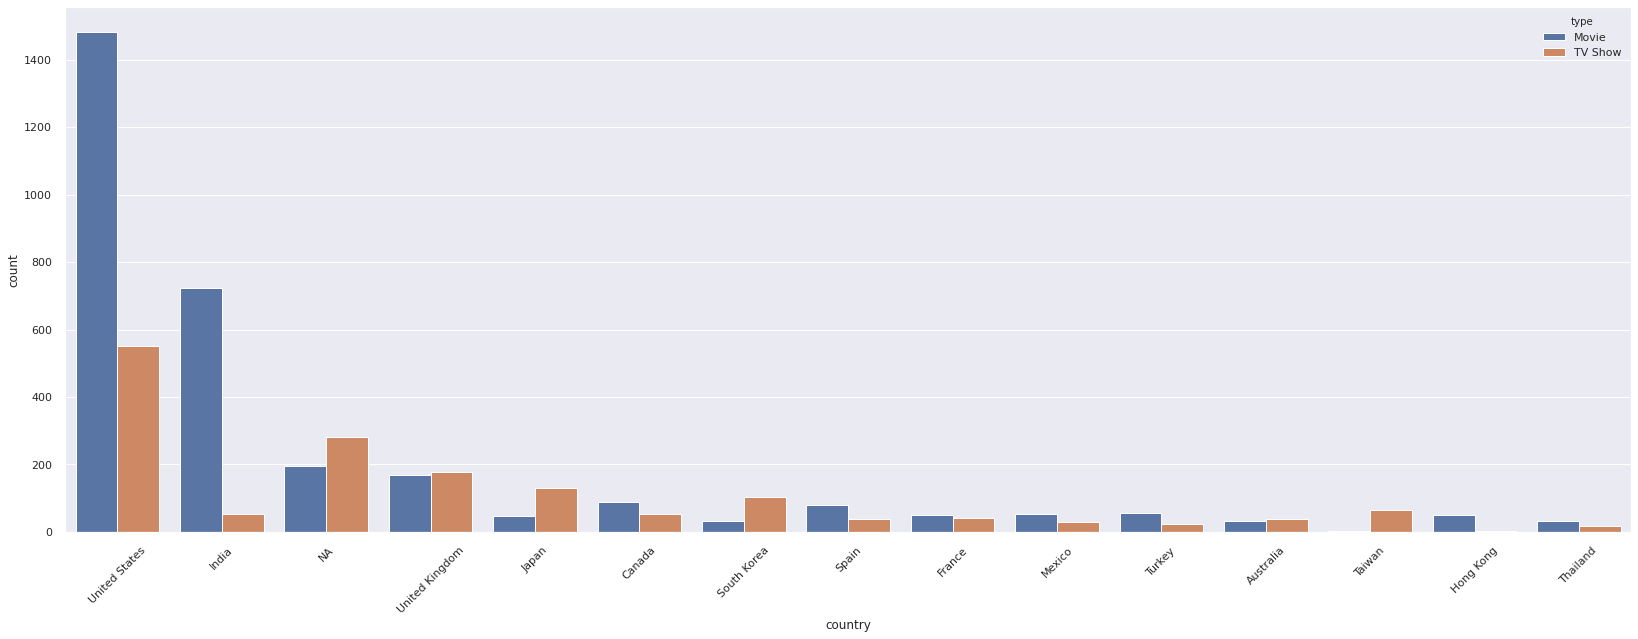

In [97]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="country",data= netflix,hue= "type",order = netflix['country'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

In [98]:
fig = px.pie(netflix,values = netflix['country'].value_counts()[:10],names = netflix['country'].value_counts()[:10].index,labels= netflix['country'].value_counts()[:10].index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

In [99]:
fig = go.Figure([go.Bar(y=netflix['country'].value_counts()[:20].index,
                        x=netflix['country'].value_counts()[:20],
                        orientation="h",
                        name="",
                        marker=dict(color="#a678de"))])
fig = fig.update_layout(title='Countries with most Content', height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig.show()

In [100]:
c = netflix['country'].value_counts()[:15].to_dict()
data = dict(
    count = c.values(),
    country = c.keys())
fig = px.funnel(data, x='count', y='country')
fig.show()

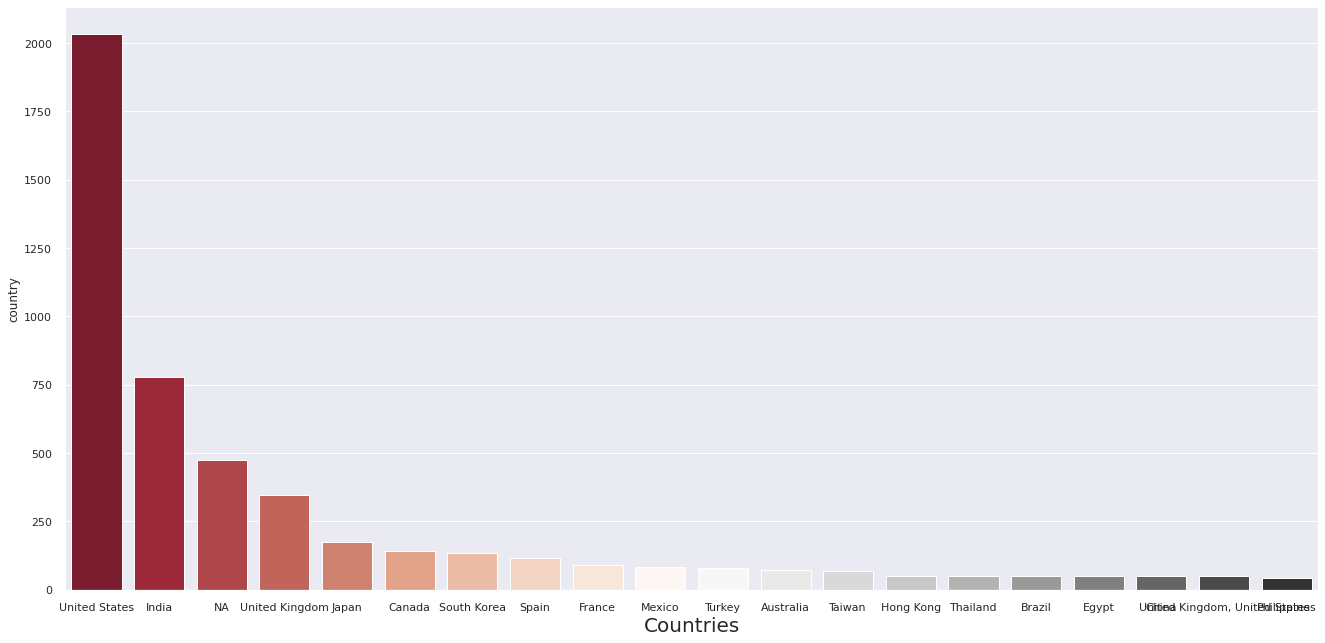

In [101]:
plt.figure(figsize=(20, 10))
sns.barplot(netflix['country'].value_counts()[:20].index, netflix['country'].value_counts()[:20], palette="RdGy")
plt.xlabel('Countries', fontsize=20)
plt.ioff()
plt.show()

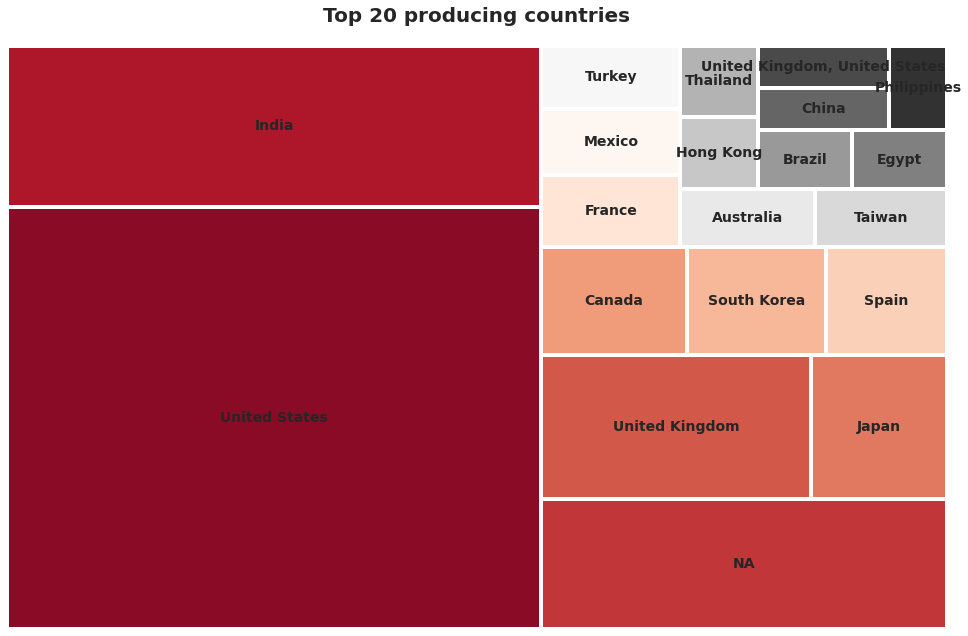

In [102]:
import squarify
y = netflix['country'].value_counts()[:20]
fig = plt.figure(figsize=(15, 10))
squarify.plot(sizes = y.values, label = y.index, color = sns.color_palette("RdGy", n_colors = 20), 
              linewidth=4, text_kwargs={'fontsize':14, 'fontweight':'bold'})
plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize=20, fontweight='bold')
plt.axis('off')
plt.show()

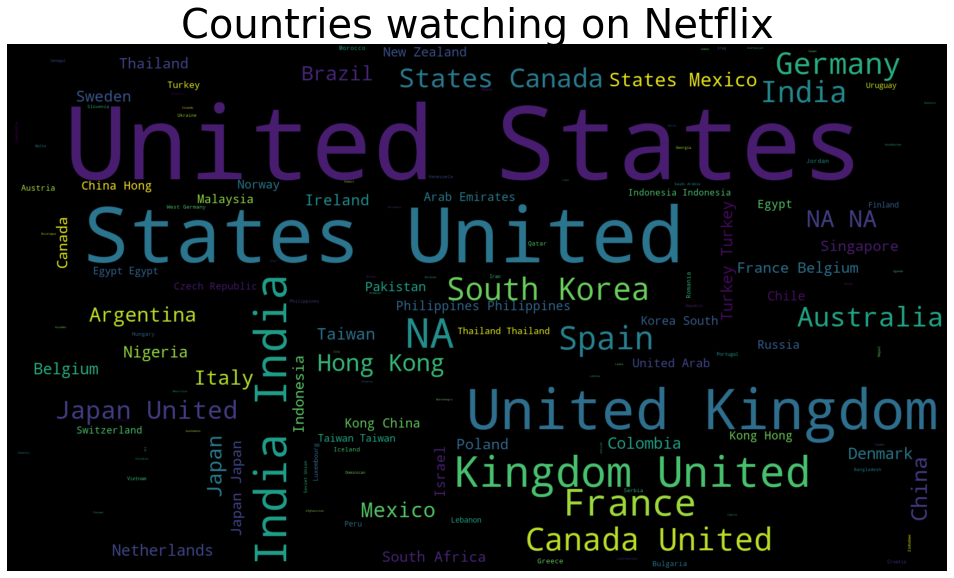

In [103]:
wordcloud = WordCloud(background_color = "black",width=1730,height=970).generate(" ".join(netflix.country))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.title("Countries watching on Netflix",color="black",fontsize=40)
plt.figure(1,figsize=(12,12))
plt.show()

In [104]:
Country = pd.DataFrame(netflix["country"].value_counts().reset_index().values,columns=["country","TotalShows"])
Country.head()

country TotalShows
0   United States       2032
1           India        777
2              NA        476
3  United Kingdom        348
4           Japan        176

In [105]:
fig = px.choropleth(   
    locationmode='country names',
    locations=Country.country,
    featureidkey="Country.country",
    labels=Country["TotalShows"]
)
fig.show()

In [106]:
Country2 = netflix.groupby('year_added')['country'].value_counts().reset_index(name='counts')
Country2.head()

year_added        country  counts
0      2008.0  United States       2
1      2009.0        Denmark       1
2      2009.0  United States       1
3      2010.0  United States       1
4      2011.0  United States      12

In [107]:
fig  = px.choropleth(Country2, locations="country", color="counts", locationmode="country names",
                    animation_frame="year_added", range_color=[0, 200], color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title="Comparison by Country")
fig.show()

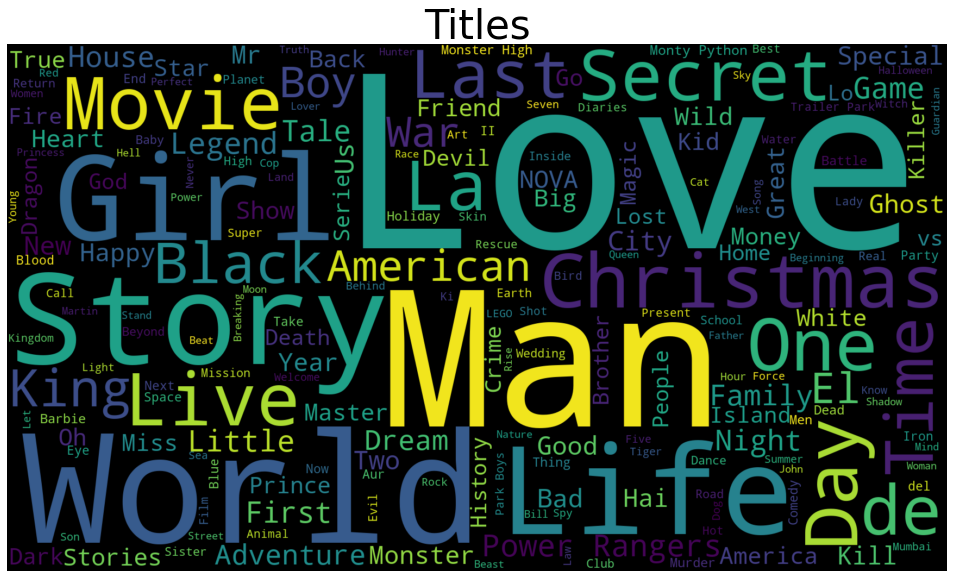

In [108]:
wordcloud = WordCloud(background_color = "black",width=1730,height=970).generate(" ".join(netflix.title))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.title("Titles", color="black", fontsize=40)
plt.figure(1,figsize=(12,12))
plt.show()

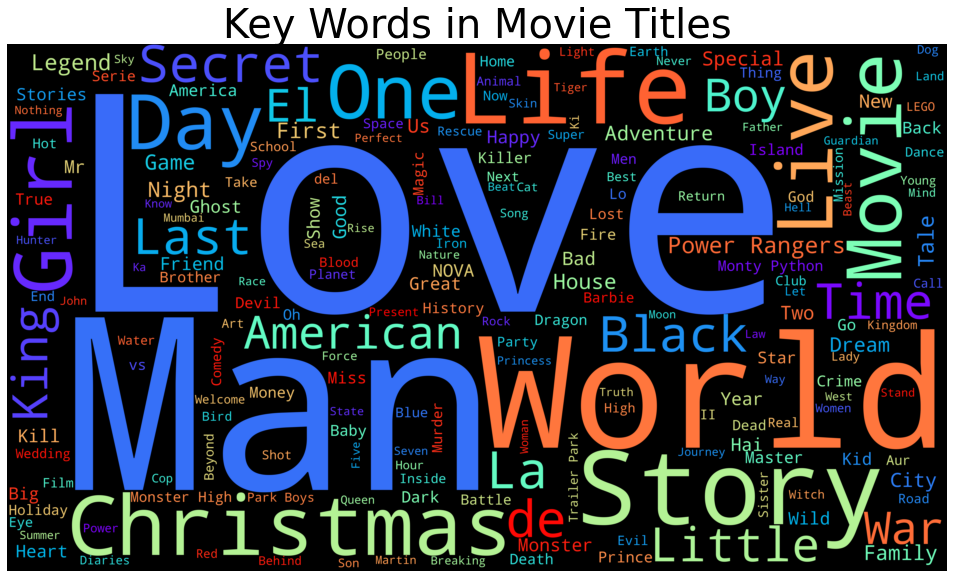

In [109]:
wrds = netflix['title'].str.split("(").str[0].value_counts().keys()
wordcloud = WordCloud(stopwords=STOPWORDS,scale = 5,background_color = "black",width=1730,height=970, colormap="rainbow").generate(" ".join(wrds))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.title("Key Words in Movie Titles", color="black", fontsize=40)
plt.figure(1,figsize=(12,12))
plt.show()

In [110]:
netflix["listed_in"].value_counts()

Documentaries                                                   299
Stand-Up Comedy                                                 273
Dramas, International Movies                                    248
Dramas, Independent Movies, International Movies                186
Comedies, Dramas, International Movies                          174
                                                               ... 
TV Sci-Fi & Fantasy, TV Thrillers                                 1
Action & Adventure, Anime Features, Children & Family Movies      1
Classic & Cult TV, TV Sci-Fi & Fantasy                            1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy        1
Docuseries, Kids' TV, Science & Nature TV                         1
Name: listed_in, Length: 461, dtype: int64

In [111]:
netflix["listed_in"].value_counts()[0:25]

Documentaries                                             299
Stand-Up Comedy                                           273
Dramas, International Movies                              248
Dramas, Independent Movies, International Movies          186
Comedies, Dramas, International Movies                    174
Kids' TV                                                  159
Documentaries, International Movies                       150
Children & Family Movies, Comedies                        129
Comedies, International Movies                            120
Children & Family Movies                                  120
Dramas, International Movies, Romantic Movies             108
Action & Adventure, Dramas, International Movies          103
Comedies, International Movies, Romantic Movies            97
Dramas, International Movies, Thrillers                    93
International TV Shows, TV Dramas                          92
Crime TV Shows, International TV Shows, TV Dramas          92
Dramas  

In [112]:
top_listed_in = netflix["listed_in"].value_counts()[:25]

In [113]:
fig = px.pie(netflix,values = top_listed_in,names = top_listed_in.index,labels= top_listed_in.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

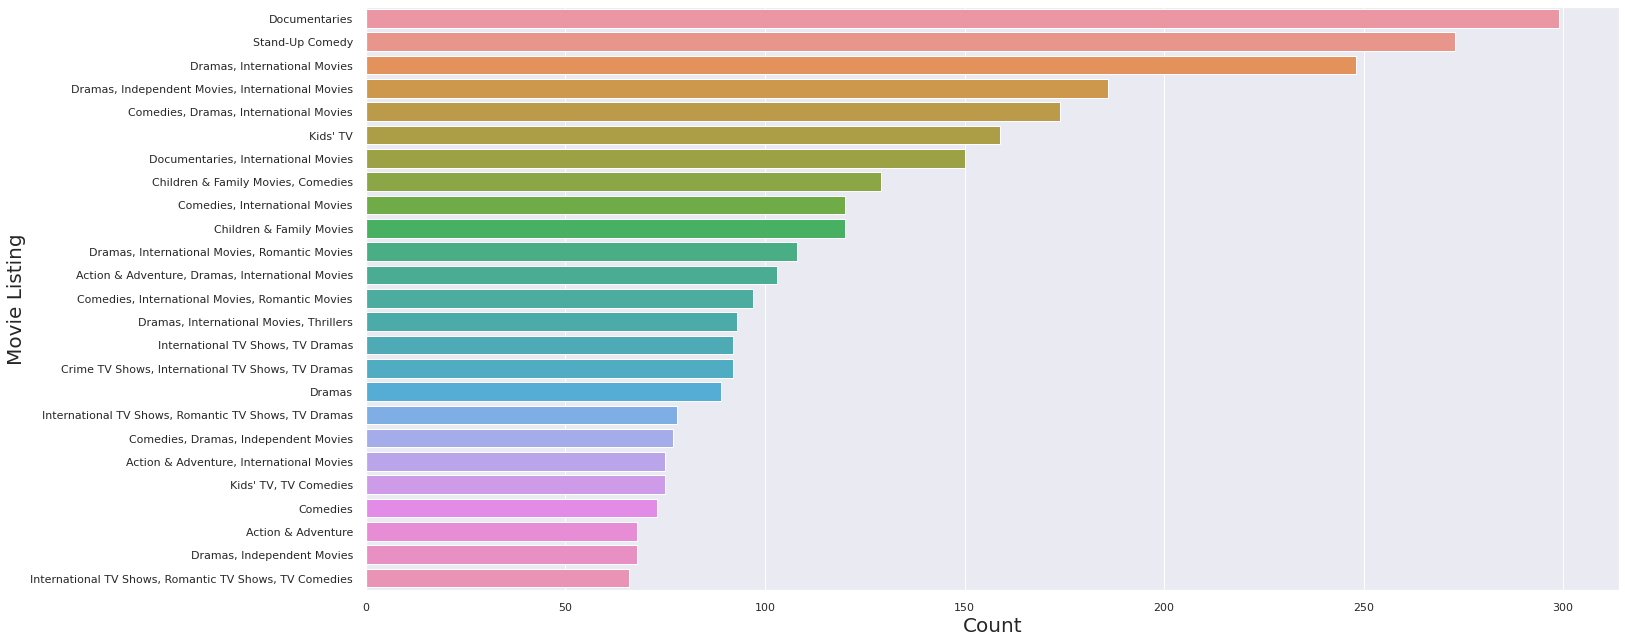

In [114]:
plt.figure(figsize=(20, 10))
sns.barplot(top_listed_in, top_listed_in.index)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Movie Listing', fontsize=20)
plt.ioff()
plt.show()

In [115]:
c = netflix['listed_in'].value_counts()[:25].to_dict()
data = dict(
    count = c.values(),
    genre = c.keys())
fig = px.funnel(data, x='count', y='genre')
fig.show()

In [116]:
genres = list(movies['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',''))
gen[:20]

['Children&FamilyMovies',
 'Comedies',
 'Stand-UpComedy',
 'Comedies',
 'InternationalMovies',
 'Sci-Fi&Fantasy',
 'Thrillers',
 'Stand-UpComedy',
 'Action&Adventure',
 'Thrillers',
 'Stand-UpComedy',
 'Action&Adventure',
 'Dramas',
 'InternationalMovies',
 'Children&FamilyMovies',
 'Children&FamilyMovies',
 'Children&FamilyMovies',
 'Children&FamilyMovies',
 'Children&FamilyMovies',
 'Children&FamilyMovies']

In [117]:
g = Counter(gen)
g

Counter({'Children&FamilyMovies': 378,
         'Comedies': 1113,
         'Stand-UpComedy': 281,
         'InternationalMovies': 1927,
         'Sci-Fi&Fantasy': 193,
         'Thrillers': 392,
         'Action&Adventure': 597,
         'Dramas': 1623,
         'CultMovies': 55,
         'IndependentMovies': 552,
         'RomanticMovies': 376,
         'Documentaries': 668,
         'HorrorMovies': 262,
         'Music&Musicals': 243,
         'AnimeFeatures': 45,
         'Faith&Spirituality': 47,
         'LGBTQMovies': 60,
         'Movies': 56,
         'ClassicMovies': 84,
         'SportsMovies': 157})

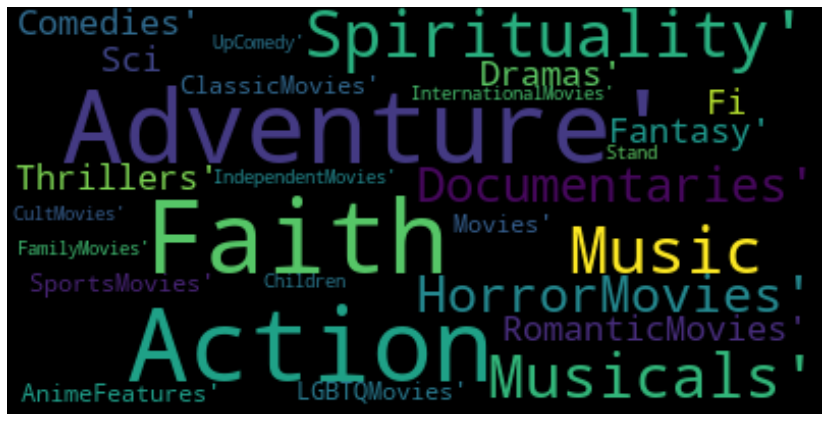

In [118]:
text = list(set(gen))
plt.rcParams['figure.figsize']=(13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='black').generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Genres')

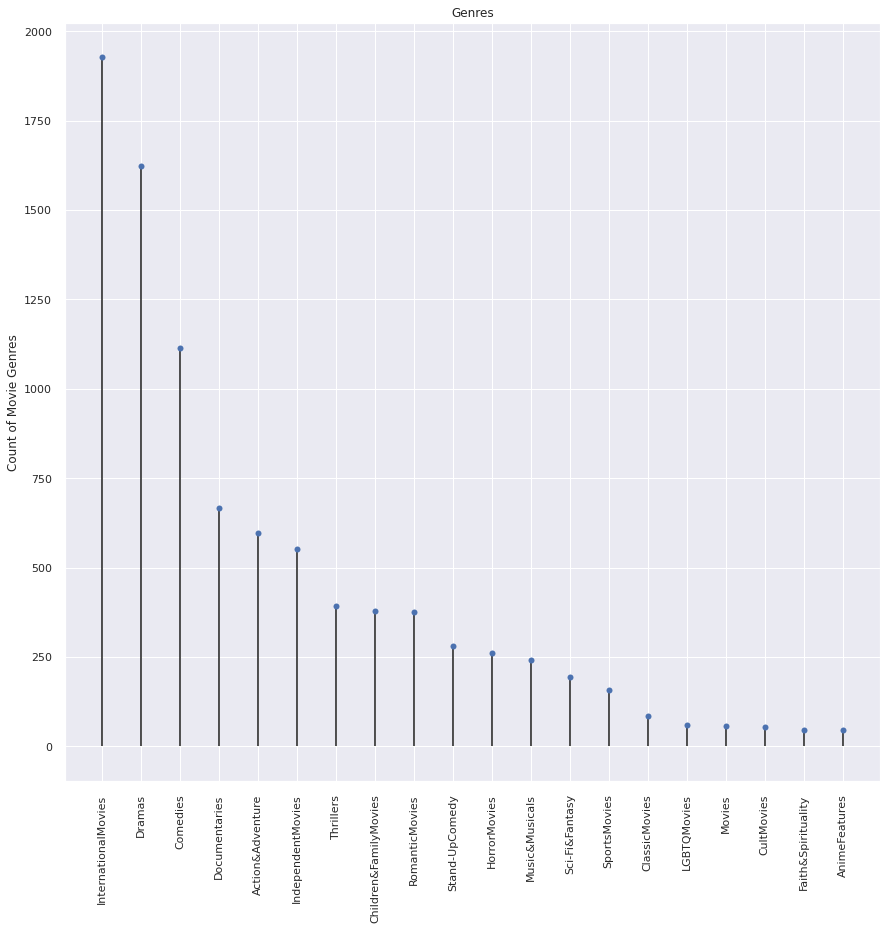

In [119]:
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse=True)}
fig, ax = plt.subplots()
x = list(g.keys())
y = list(g.values())
ax.vlines(x, ymin=0, ymax=y)
ax.plot(x, y, "o")
ax.set_xticklabels(x, rotation=90)
ax.set_ylabel("Count of Movie Genres")
ax.set_title("Genres")

In [120]:
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse=True)}
data = dict(
    count = g.values(),
    genre = g.keys())
fig = px.funnel(data, x='count', y='genre')
fig.show()

In [121]:
gen = pd.DataFrame.from_dict(g, orient='index', columns=['Count'])
gen.head()

Count
InternationalMovies   1927
Dramas                1623
Comedies              1113
Documentaries          668
Action&Adventure       597

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

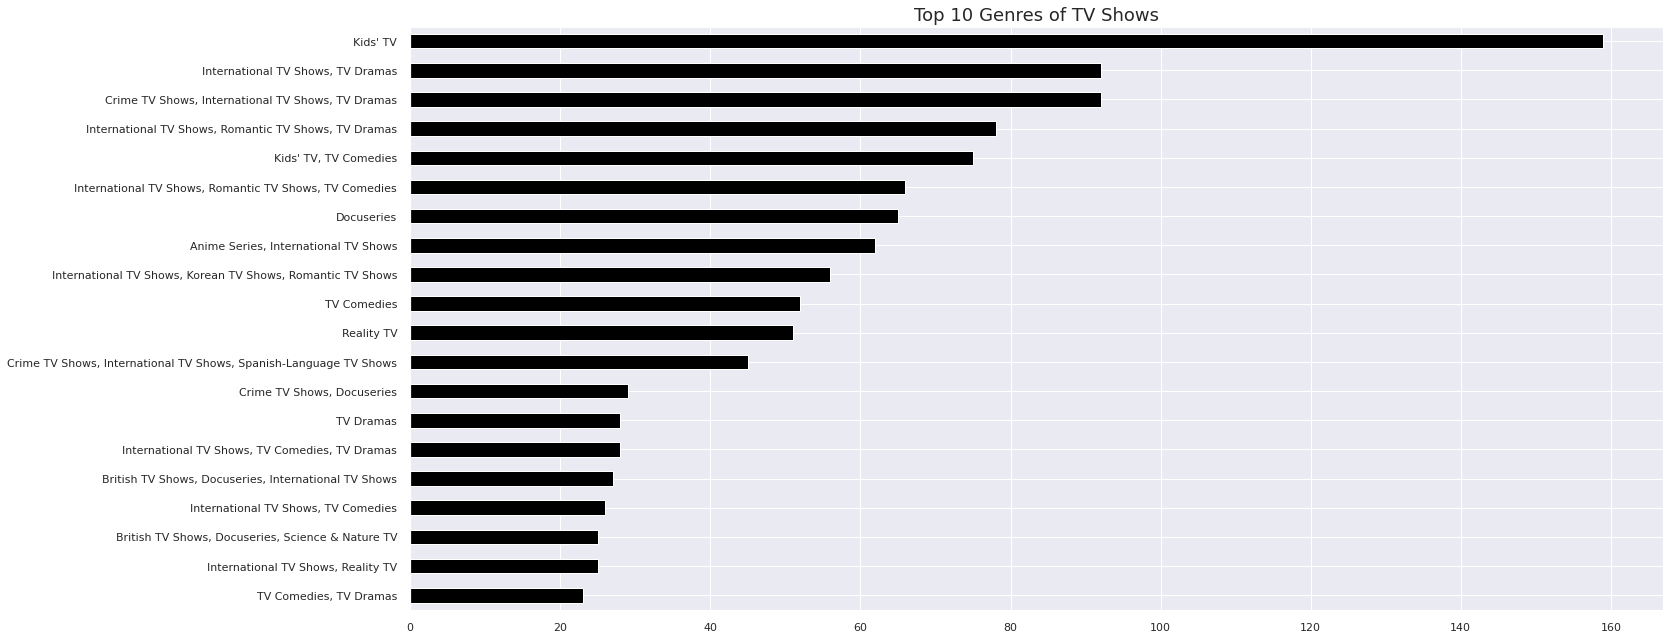

In [122]:
plt.figure(figsize=(20, 10))
shows['listed_in'].value_counts()[:20][::-1].plot(kind="barh", color="black")
plt.title("Top 10 Genres of TV Shows", fontsize=18)

In [123]:
netflix['length']=netflix['description'].str.len()
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

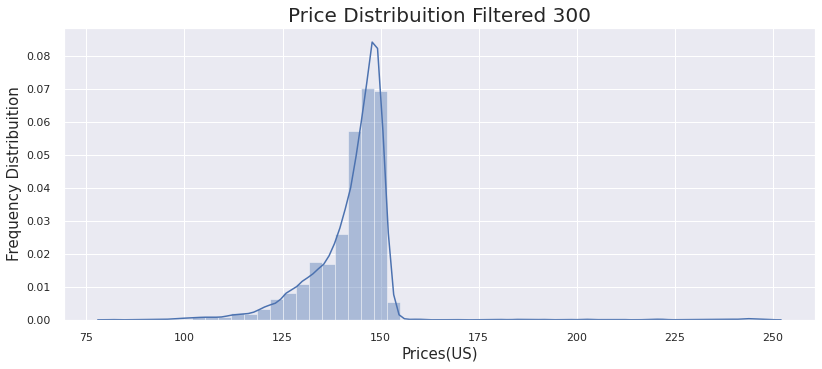

In [124]:
plt.figure(figsize=(12,5))

plot = sns.distplot(netflix['length'])
plot.set_title("Price Distribuition Filtered 300", fontsize=20)
plot.set_xlabel("Prices(US)", fontsize=15)
plot.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

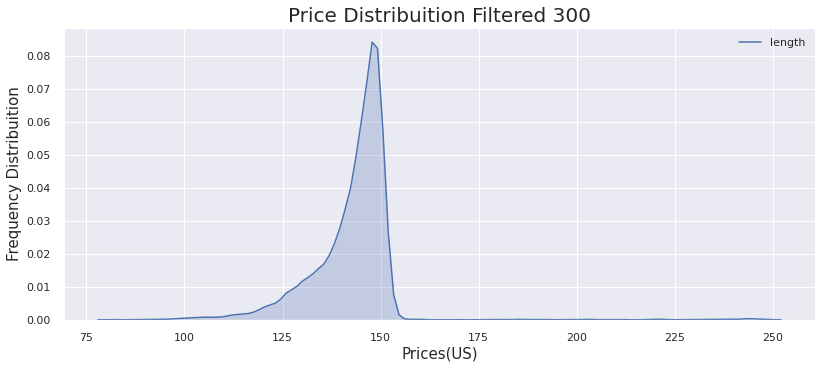

In [125]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
plot = sns.kdeplot(netflix['length'], shade=True)
plot.set_title("Price Distribuition Filtered 300", fontsize=20)
plot.set_xlabel("Prices(US)", fontsize=15)
plot.set_ylabel("Frequency Distribuition", fontsize=15)


plt.show()

In [126]:
netflix['duration'].head()

0    90
1    94
2      
3      
4    99
Name: duration, dtype: object

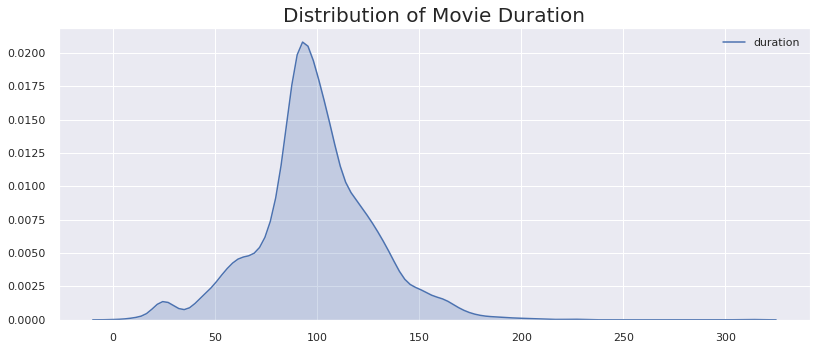

In [127]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
plot = sns.kdeplot(data=movies['duration'], shade=True)
plot.set_title("Distribution of Movie Duration", fontsize=20)

plt.show()

In [128]:
movies['duration'] = movies.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)
x1 = movies['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=['#6ad49b'])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

In [129]:
trace = go.Histogram(x = netflix['duration'],
                     xbins = dict(size=0.5),
                     marker = dict(color = 'rgb(26, 118, 255)')
                    )
layout = go.Layout(template = 'plotly_dark', title='Distribution of Durations', xaxis=dict(title='Duration'))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

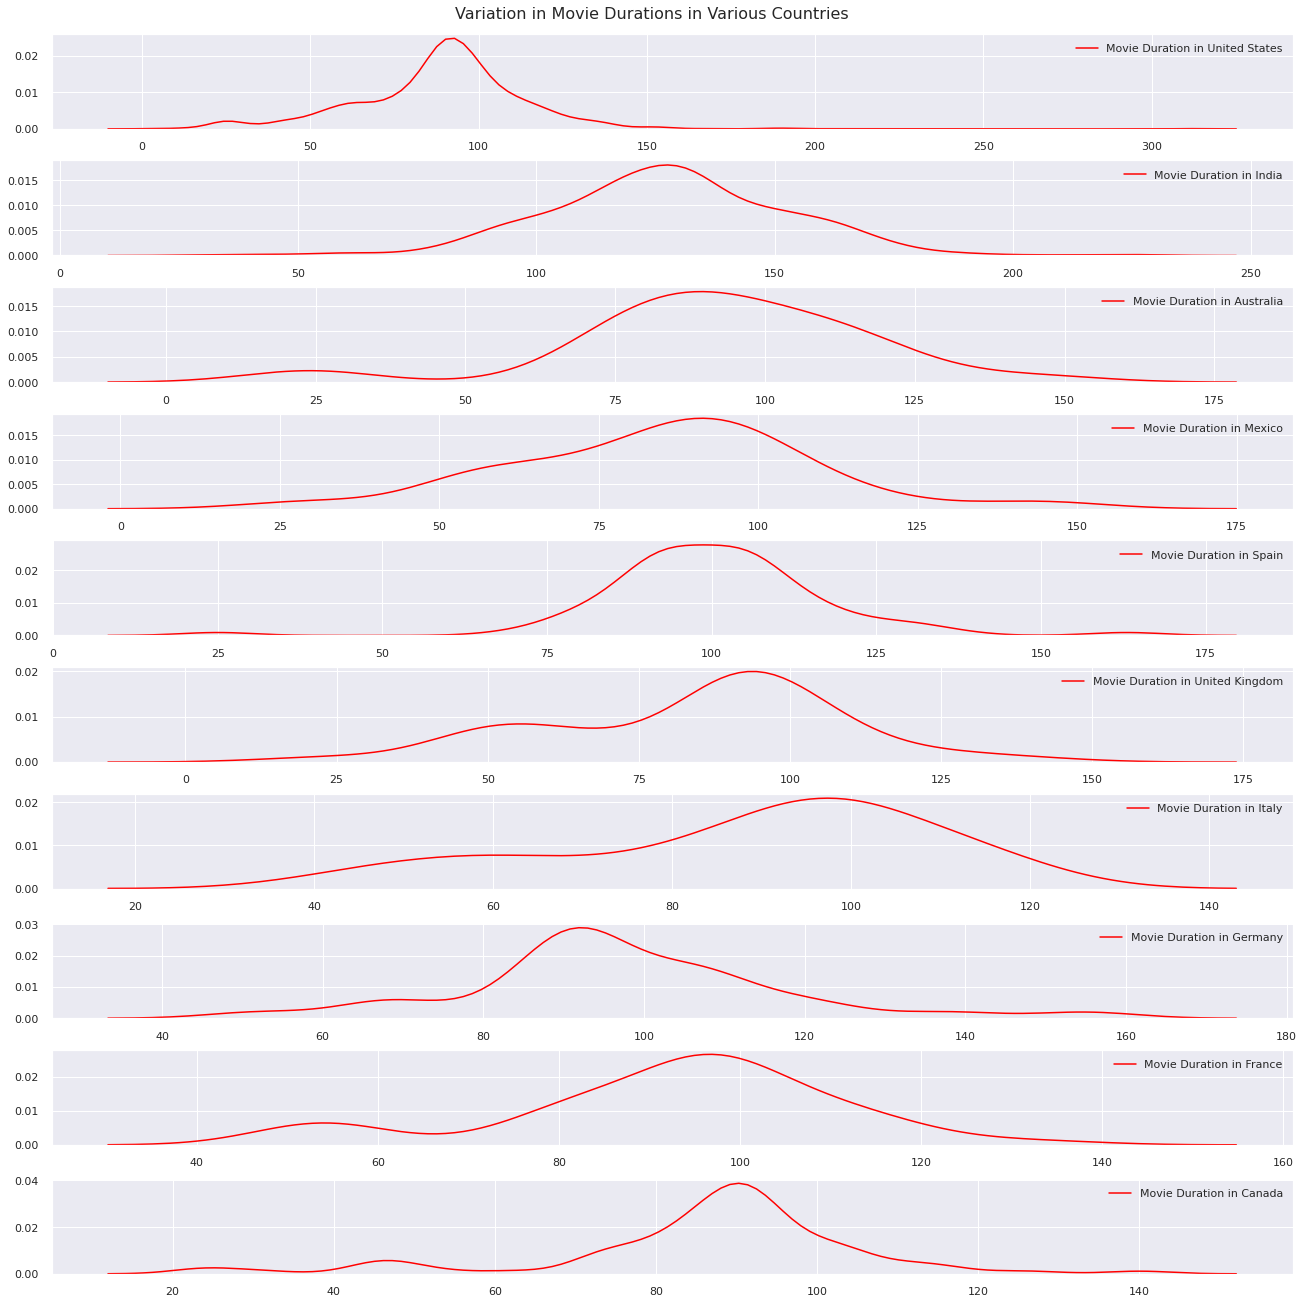

In [130]:
def duration_in_country(country):
    netflix_country_dur = netflix.loc[(netflix.country==country) & (netflix.type == 'Movie')].duration[:]
    netflix_country_dur = netflix_country_dur.apply(lambda x: int(x.strip(' minSeaso')))
    
    return netflix_country_dur

fig, axes = plt.subplots(10, 1, figsize=(18,18), constrained_layout=True)
fig.suptitle(f"Variation in Movie Durations in Various Countries", fontsize=16)
Countries = ['United States', 'India', 'Australia', 'Mexico', 'Spain', 'United Kingdom', 'Italy', 'Germany', 'France', 'Canada']

for i in range(10):
    country_mov_dur = duration_in_country(Countries[i])
    sns.kdeplot(country_mov_dur, Label=f"Movie Duration in {Countries[i]}", color="red", ax=axes[i])

In [131]:
old = netflix.sort_values('release_year', ascending=True)
old_movies = old[old['duration']!=""][:20]
old_movies

show_id   type                                             title  \
2011  60027945  Movie                                    Prelude to War   
2013  60027942  Movie                              The Battle of Midway   
2022  80119186  Movie     Undercover: How to Operate Behind Enemy Lines   
2023  70013050  Movie                Why We Fight: The Battle of Russia   
2026  70022548  Movie                   WWII: Report from the Aleutians   
2017  80119194  Movie  The Memphis Belle: A Story of a\nFlying Fortress   
2019  80119191  Movie                                 The Negro Soldier   
2021  80119189  Movie                                  Tunisian Victory   
2012  80119188  Movie                                        San Pietro   
2009  80119192  Movie                          Nazi Concentration Camps   
2005  80119190  Movie                           Know Your Enemy - Japan   
2930   1005494  Movie                                      The Stranger   
2006  80119187  Movie                                Let There Be Light   
2020  80119193  Movie                                       Thunderbolt   
2981  60003082  Movie                                   White Christmas   
1401  70031792  Movie                             Rebel Without a Cause   
1369    516788  Movie                                  Forbidden Planet   
1371    542137  Movie                                              Gigi   
1354  70046968  Movie                             Cat on a Hot Tin Roof   
713   80158391  Movie                                             Ujala   

                                               director  \
2011                                        Frank Capra   
2013                                          John Ford   
2022                                          John Ford   
2023                        Frank Capra, Anatole Litvak   
2026                                        John Huston   
2017                                      William Wyler   
2019                                     Stuart Heisler   
2021  Frank Capra, John Huston, Hugh Stewart, Roy Bo...   
2012                                        John Huston   
2009                                     George Stevens   
2005                           Frank Capra, Joris Ivens   
2930                                       Orson Welles   
2006                                        John Huston   
2020                        William Wyler, John Sturges   
2981                                     Michael Curtiz   
1401                                       Nicholas Ray   
1369                                     Fred M. Wilcox   
1371                 Vincente Minnelli, Charles Walters   
1354                                     Richard Brooks   
713                                       Naresh Saigal   

                                                   cast  \
2011                                                NaN   
2013                          Henry Fonda, Jane Darwell   
2022                                                NaN   
2023                                                NaN   
2026                                                NaN   
2017                                                NaN   
2019                                                NaN   
2021                                   Burgess Meredith   
2012                                                NaN   
2009                                                NaN   
2005                        Walter Huston, Dana Andrews   
2930  Edward G. Robinson, Loretta Young, Orson Welle...   
2006                                      Walter Huston   
2020                       James Stewart, Lloyd Bridges   
2981  Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...   
1401  James Dean, Natalie Wood, Sal Mineo, Jim Backu...   
1369  Leslie Nielsen, Walter Pidgeon, Anne Francis, ...   
1371  Leslie Caron, Maurice Chevalier, Louis Jourdan...   
1354  Elizabeth Taylor, Paul Newman, Burl Ives, Jack...   
713   Mala 

In [132]:
old_shows = old[old['season_count']!=""][:20]
old_shows

show_id     type                                title  \
4292  81030762  TV Show    Pioneers: First Women Filmmakers*   
4079  80161851  TV Show  Pioneers of African-American Cinema   
5981  70172488  TV Show  The Twilight Zone (Original Series)   
5980  70155574  TV Show               The Andy Griffith Show   
5704  70136140  TV Show                            Star Trek   
614   80236357  TV Show     Monty Python's Fliegender Zirkus   
5669  70213238  TV Show         Monty Python's Flying Circus   
5830  80244567  TV Show                           Dad's Army   
4273  70205634  TV Show                             El Chavo   
4369  80153226  TV Show                        Ninja Hattori   
982   70205018  TV Show                             Robotech   
6016  70267476  TV Show                          Saint Seiya   
3473  70202600  TV Show                           Shaka Zulu   
5774  70157402  TV Show                    Highway to Heaven   
369   70208520  TV Show                            High Risk   
1681  70212980  TV Show    The Super Mario Bros. Super Show!   
6094  80023876  TV Show                  Pee-wee's Playhouse   
3864  70202577  TV Show             Ken Burns: The Civil War   
5982  70153408  TV Show                           Twin Peaks   
2761  80097532  TV Show       Bob Ross: Beauty Is Everywhere   

                                               director  \
4292                                                NaN   
4079  Oscar Micheaux, Spencer Williams, Richard E. N...   
5981                                                NaN   
5980                                                NaN   
5704                                                NaN   
614                                                 NaN   
5669                                                NaN   
5830                                                NaN   
4273                                                NaN   
4369                                                NaN   
982                                                 NaN   
6016                                                NaN   
3473                                                NaN   
5774                                                NaN   
369                                                 NaN   
1681                                                NaN   
6094                                                NaN   
3864                                          Ken Burns   
5982                                                NaN   
2761                                                NaN   

                                                   cast  \
4292                                                NaN   
4079                                                NaN   
5981                                        Rod Serling   
5980  Andy Griffith, Ron Howard, Don Knotts, Frances...   
5704  William Shatner, Leonard Nimoy, DeForest Kelle...   
614   Graham Chapman, John Cleese, Eric Idle, Terry ...   
5669  John Cleese, Graham Chapman, Terry Jones, Eric...   
5830  Arthur Lowe, John Le Mesurier, Clive Dunn, Joh...   
4273  Roberto Gómez Bolaños, María Antonieta de las ...   
4369  Junko Hori, Masako Sugaya, Yuko Mita, Kaneta K...   
982   Jean-Claude Ballard, Gregory Snegoff, Cam Clar...   
6016  Toru Furuya, Hirotaka Suzuoki, Ryo Horikawa, K...   
3473  Edward Fox, Robert Powell, Trevor Howard, Fion...   
5774                      Michael Landon, Victor French   
369                                                 NaN   
1681  Captain Lou Albano, Danny Wells, Jeannie Elias...   
6094                                       Paul Reubens   
3864  Sam Waterston, Julie Harris, Jason Robards, Mo...   
5982  Kyle MacLachlan, Michael Ontkean, Mädchen Amic...   
2761                                           Bob Ross   

                                                country date_added  \
4292                                                 NA 2018-12-30   
4079                                      

In [133]:
newest = netflix.sort_values(by='release_year', ascending=False)
newest_movies = newest[newest['duration']!=''][:20]
newest_movies

show_id   type                                    title  \
3249  81006825  Movie            All the Freckles in the World   
3427  81060049  Movie               Leslie Jones: Time Machine   
3195  80233408  Movie                    Live Twice, Love Once   
3180  81214114  Movie                            Bulletproof 2   
3518  81088083  Movie                            Ghost Stories   
3352  81127902  Movie                        A Fall from Grace   
4730  81153372  Movie                   Westside vs. the World   
4751  81088318  Movie                              The Pursuit   
1135  80198859  Movie                                  Brother   
1142  81218074  Movie                          Shelby American   
1179  81217739  Movie                                Mallesham   
1153  81026188  Movie              The Knight Before Christmas   
1177  80244683  Movie               Lorena, Light-Footed Woman   
4771  81143771  Movie                          Enter the Anime   
1167  80221584  Movie             Bikram: Yogi, Guru, Predator   
4750  81112446  Movie                                    Badla   
1170  81217738  Movie                                Dorasaani   
4801  81034010  Movie                           Back to School   
0     81145628  Movie  Norm of the North: King Sized Adventure   
4819  80997400  Movie                                   Kardec   

                                               director  \
3249                                       Yibrán Asuad   
3427                          David Benioff, D.B. Weiss   
3195                                       Maria Ripoll   
3180                                   Don Michael Paul   
3518  Anurag Kashyap, Dibakar Banerjee, Karan Johar,...   
3352                                        Tyler Perry   
4730                                      Michael Fahey   
4751                                        John Papola   
1135                                     Julien Abraham   
1142                           Nate Adams, Adam Carolla   
1179                                              Raj R   
1153                                    Monika Mitchell   
1177                                  Juan Carlos Rulfo   
4771                                      Alex Burunova   
1167                                          Eva Orner   
4750                                        Sujoy Ghosh   
1170                                       KVR Mahendra   
4801                              Rémy Four, Julien War   
0                              Richard Finn, Tim Maltby   
4819                                    Wagner de Assis   

                                                   cast  \
3249  Hánssel Casillas, Loreto Peralta, Andrea Sutto...   
3427                                       Leslie Jones   
3195  Oscar Martínez, Inma Cuesta, Mafalda Carbonell...   
3180  Faizon Love, Kirk Fox, Tony Todd, Pearl Thusi,...   
3518  Janhvi Kapoor, Sobhita Dhulipala, Sukant Goel,...   
3352  Crystal Fox, Phylicia Rashad, Cicely Tyson, Br...   
4730                         Ron Perlman, Louie Simmons   
4751                                      Arthur Brooks   
1135  MHD, Darren Muselet, Aïssa Maïga, Jalil Lesper...   
1142                                     Carroll Shelby   
1179     Jhansi, Priyadarshi Pullikonda, Ananya Nagalla   
1153  Vanessa Hudgens, Josh Whitehouse, Emmanuelle C...   
1177                                     Lorena Ramírez   
4771  Kozo Morishita, Yoko Takahashi, Shinji Aramaki...   
1167                                   Bikram Choudhury   
4750  Amitabh Bachchan, Taapsee Pannu, Amrita Singh,...   
1170  Anand Deverakonda, Shivatmika Rajasekhar, Kann...   
4801  Ludovik, Jérôme Niel, Nicolas Berno, Johann Di...   
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
4819  Leonardo Medeiros, Sandra Corveloni, Genezio d...   

                                       country date_added  release_year  \
3249                                    Mexico 2020-01-03        

In [134]:
newest_shows = newest[newest['season_count']!=''][:20]
newest_shows

show_id     type                                              title  \
3467  81011449  TV Show                                     Medical Police   
3220  80997687  TV Show                                            Dracula   
3436  80239306  TV Show                         The Healing Powers of Dude   
3189  81039393  TV Show                                              Cheer   
3464  80237329  TV Show                                   AJ and the Queen   
3466  81183491  TV Show                       Jamtara - Sabka Number Ayega   
3472  81074060  TV Show                                         Until Dawn   
3541  80117557  TV Show                                            Messiah   
1315  81034946  TV Show                                 Maradona in Mexico   
3546  80197991  TV Show  Nisman: The Prosecutor, the President, and the...   
3562  80201590  TV Show                                       Spinning Out   
3573  81044551  TV Show                                         The Circle   
3221  80237347  TV Show                                Go! Go! Cory Carson   
3426  80221553  TV Show                   Kipo and the Age of Wonderbeasts   
3379  81062828  TV Show         Killer Inside: The Mind of Aaron Hernandez   
3363  80996973  TV Show                                  Handsome Siblings   
3353  80995039  TV Show                                               Ares   
3354  81062580  TV Show                                 Nailed It! Germany   
3325  81160763  TV Show                                     Sex, Explained   
1141  80244700  TV Show                                   Nobody's Looking   

             director                                               cast  \
3467              NaN  Erinn Hayes, Rob Huebel, Malin Akerman, Rob Co...   
3220              NaN            Claes Bang, Dolly Wells, John Heffernan   
3436              NaN  Jace Chapman, Larisa Oleynik, Tom Everett Scot...   
3189              NaN                                                NaN   
3464              NaN  RuPaul Charles, Izzy G., Michael-Leon Wooley, ...   
3466  Soumendra Padhi  Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...   
3472              NaN  Ahmed Sylla, Alban Ivanov, Ornella Fleury, Nat...   
3541              NaN  Michelle Monaghan, Mehdi Dehbi, John Ortiz, To...   
1315              NaN                             Diego Armando Maradona   
3546   Justin Webster                                                NaN   
3562              NaN  Kaya Scodelario, January Jones, Will Kemp, Wil...   
3573              NaN                                    Michelle Buteau   
3221              NaN  Alan C. Lim, Paul Killam, Maisie Benson, Kerry...   
3426              NaN  Karen Fukuhara, Sydney Mikayla, Deon Cole, Coy...   
3379              NaN                                    Aaron Hernandez   
3363              NaN  Hu Yitian, Chen Zheyuan, Liang Jie, Vicky Lian...   
3353              NaN  Jade Olieberg, Tobias Kersloot, Lisa Smit, Fri...   
3354              NaN                     Angelina Kirsch, Bernd Siefert   
3325              NaN                                      Janelle Monáe   
1141              NaN  Victor Lamoglia, Júlia Rabello, Kéfera Buchman...   

                               country date_added  release_year    rating  \
3467                     United States 2020-01-10          2020     TV-MA   
3220                    United Kingdom 2020-01-04          2020     TV-14   
3436                                NA 2020-01-13          2020      TV-G   
3189                     United States 2020-01-08          2020     TV-MA   
3464                     United States 2020-01-10          2020     TV-14   
3466                             India 2020-01-10          2020     TV-MA   
3472                            France 2020-01-10          2020     TV-MA   
3541                     United States 2020-01-01          2020     TV-MA   
1315  Argentina, United States, Mexico 2019-11-13          2020     TV-MA   
3

In [135]:
fig = go.Figure(data=[go.Table(header=dict(values=['title', 'release_year'],
                                           fill_color='paleturquoise'),
                               cells=dict(values=[old_shows['title'], old_shows['release_year']],
                                         fill_color='pink')
                              )])
fig.show()

In [136]:
fig = go.Figure(data=[go.Table(header=dict(values=['title', 'year_added'],
                                           fill_color='paleturquoise'),
                               cells=dict(values=[old_shows['title'], old_shows['year_added']],
                                         fill_color='pink')
                              )])
fig.show()

In [137]:
fig = go.Figure(data=[go.Table(header=dict(values=['title', 'release_year'],
                                           fill_color='paleturquoise'),
                               cells=dict(values=[old_movies['title'], old_movies['release_year']],
                                         fill_color='pink')
                              )])
fig.show()

In [138]:
fig = go.Figure(data=[go.Table(header=dict(values=['title', 'release_year'],
                                           fill_color='paleturquoise'),
                               cells=dict(values=[newest_shows['title'], newest_shows['release_year']],
                                         fill_color='pink')
                              )])
fig.show()

In [139]:
fig = go.Figure(data=[go.Table(header=dict(values=['title', 'release_year'],
                                           fill_color='paleturquoise'),
                               cells=dict(values=[newest_movies['title'], newest_movies['release_year']],
                                         fill_color='pink')
                              )])
fig.show()

In [140]:
m = movies['release_year'].value_counts().reset_index()
m = m.rename(columns={'release_year': 'count', 'index':'release_year'})
m['percent'] = m['count'].apply(lambda x: 100*x/sum(m['count']))
m = m.sort_values('release_year')

s = shows['release_year'].value_counts().reset_index()
s = s.rename(columns={'release_year': 'count', 'index':'release_year'})
s['percent'] = s['count'].apply(lambda x: 100*x/sum(s['count']))
s = s.sort_values('release_year')

m.head()

release_year  count   percent
57          1942      2  0.046893
55          1943      3  0.070340
51          1944      3  0.070340
52          1945      3  0.070340
61          1946      2  0.046893

In [141]:
trace1 = go.Bar(x=m['release_year'], y=m['count'], name="Movies", marker=dict(color="#a678de"))
trace2 = go.Bar(x=s['release_year'], y=s['count'], name="TV Shows", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content Released over the Years", legend=dict(x=0.1, y=1.1, orientation="h"), template="plotly_dark")
fig = go.Figure(data, layout=layout)
fig.show()

In [142]:
m = movies['year_added'].value_counts().reset_index()
m = m.rename(columns={'year_added': 'count', 'index':'year_added'})
m['percent'] = m['count'].apply(lambda x: 100*x/sum(m['count']))
m = m.sort_values('year_added')

s = shows['year_added'].value_counts().reset_index()
s = s.rename(columns={'year_added': 'count', 'index':'year_added'})
s['percent'] = s['count'].apply(lambda x: 100*x/sum(s['count']))
s = s.sort_values('year_added')

m.head()

year_added  count   percent
12      2008.0      1  0.023452
10      2009.0      2  0.046904
11      2010.0      1  0.023452
7       2011.0     13  0.304878
9       2012.0      4  0.093809

In [143]:
trace1 = go.Bar(x=m['year_added'], y=m['count'], name="Movies", marker=dict(color="#a678de"))
trace2 = go.Bar(x=s['year_added'], y=s['count'], name="TV Shows", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content Added over the Years", legend=dict(x=0.1, y=1.1, orientation="h"), template="plotly_dark")
fig = go.Figure(data, layout=layout)
fig.show()

In [144]:
m = movies['month_added'].value_counts().reset_index()
m = m.rename(columns={'month_added': 'count', 'index':'month_added'})
m['percent'] = m['count'].apply(lambda x: 100*x/sum(m['count']))
m = m.sort_values('month_added')

s = shows['month_added'].value_counts().reset_index()
s = s.rename(columns={'month_added': 'count', 'index':'month_added'})
s['percent'] = s['count'].apply(lambda x: 100*x/sum(s['count']))
s = s.sort_values('month_added')

m.head()

month_added  count    percent
1           1.0    458  10.741088
10          2.0    263   6.167917
4           3.0    391   9.169794
7           4.0    308   7.223265
9           5.0    295   6.918386

In [145]:
trace1 = go.Bar(x=m['month_added'], y=m['count'], name="Movies", marker=dict(color="#a678de"))
trace2 = go.Bar(x=s['month_added'], y=s['count'], name="TV Shows", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content Added over the Months", legend=dict(x=0.1, y=1.1, orientation="h"), template="plotly_dark")
fig = go.Figure(data, layout=layout)
fig.show()

In [146]:
s = shows['season_count'].value_counts().reset_index()
s = s.rename(columns = {'season_count':'count', 'index':'season_count'})
s['percent'] = s['count'].apply(lambda x: 100*x/sum(s['count']))
s = s.sort_values('season_count')

trace1 = go.Bar(x=s['season_count'], y=s['count'], name="TV Shows", marker=dict(color="#a678de"))
data = [trace1]
layout = go.Layout(title="TV Show Seasons", legend=dict(x=0.1, y=1.1, orientation="h"), 
                   template="plotly_dark", 
                   xaxis=dict(title="Number of Seasons"), 
                   yaxis=dict(title="Number of Shows"))
fig = go.Figure(data, layout=layout)
fig.show()

In [147]:
trace = go.Histogram(x = netflix['season_count'], marker = dict(color='rgb(249, 6, 6)'))
layout = go.Layout(template='plotly_dark', title='Seasons of TV Shows', 
                   xaxis=dict(title="Number of Seasons"),
                   yaxis=dict(title="Number of Shows")
                  )
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [148]:
s.head()

season_count  count    percent
0             1   1321  67.089893
9            10      3   0.152362
10           11      3   0.152362
12           12      2   0.101574
13           13      2   0.101574

In [149]:
col = ['title', 'season_count']
top = shows[col]
top = top.sort_values(by='season_count', ascending=False)
top

title season_count
6059  LEGO Ninjago: Masters of Spinjitzu            9
6031                   The Office (U.S.)            9
5640                      Forensic Files            9
5629                    Shameless (U.S.)            9
5824            Club Friday The Series 6            9
...                                  ...          ...
2769                      Krishna Balram            1
2762             Gentlemen and Gangsters            1
2761      Bob Ross: Beauty Is Everywhere            1
2759         72 Dangerous Places to Live            1
4318                     Murder Mountain            1

[1969 rows x 2 columns]

In [150]:
for i in range(len(top)):
    top['season_count'].iloc[i] = int(top['season_count'].iloc[i])

In [151]:
top25 = top[:25]
top25

title season_count
6059   LEGO Ninjago: Masters of Spinjitzu            9
6031                    The Office (U.S.)            9
5640                       Forensic Files            9
5629                     Shameless (U.S.)            9
5824             Club Friday The Series 6            9
5633                               Naruto            9
5636                     The Walking Dead            9
5737            Trolls: The Beat Goes On!            8
5810                          Royal Pains            8
5814                     Call the Midwife            8
6064                         Under Arrest            8
5700                              Charmed            8
6112          Voltron: Legendary Defender            8
6052             Club Friday The Series 8            8
5605                           Portlandia            8
6222                                Weeds            8
5980               The Andy Griffith Show            8
6023                               Dexter            8
5593                  The Vampire Diaries            8
5771                       That '70s Show            8
6189                  Spirit: Riding Free            8
5607                American Horror Story            8
5754  My Little Pony: Friendship Is Magic            8
5627                            Offspring            7
5699                           Still Game            7

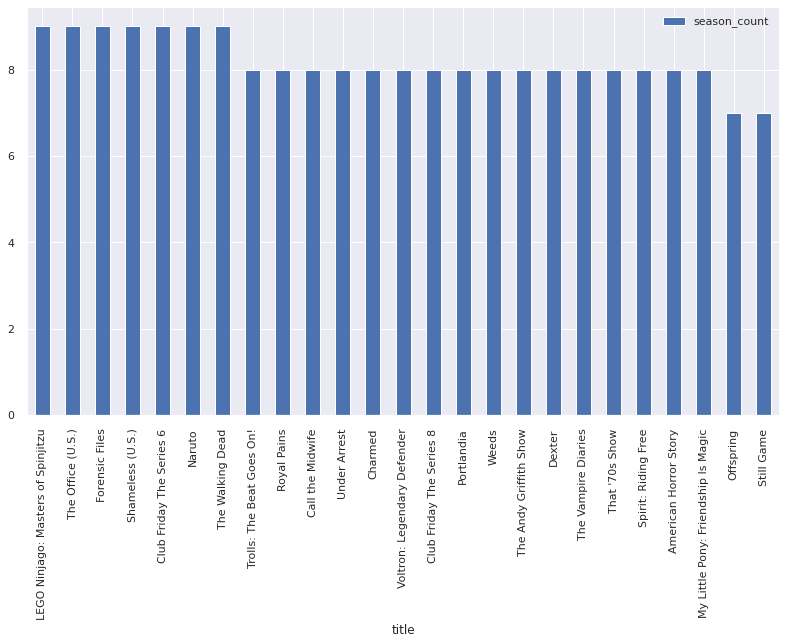

In [152]:
top25.plot(kind='bar',x='title',y='season_count', figsize=(12, 7))

In [153]:
fig = go.Figure(data=[go.Table(header=dict(values=['title', 'season_count']),
                              cells = dict(values=[top25['title'], top25['season_count']], fill_color = 'lavender'))])
fig.show()

In [154]:
bottom25 = top[::-1][:25]
bottom25

title season_count
4318                  Murder Mountain            1
2759      72 Dangerous Places to Live            1
2761   Bob Ross: Beauty Is Everywhere            1
2762          Gentlemen and Gangsters            1
2769                   Krishna Balram            1
2770                     Mr. Sunshine            1
2774                    Diamond Lover            1
2775                       King’s War            1
2776             Qin Empire: Alliance            1
2778          The Legend of Bruce Lee            1
2779             NSU German History X            1
2790                      In The Dark            1
2792        The Legend of White Snake            1
2758                72 Cutest Animals            1
2794                    Dharmakshetra            1
2796   Stories by Rabindranath Tagore            1
2801  Bangkok Love Stories: Innocence            1
2805                 Reality of Dream            1
2807          Wet Hot American Summer            1
2808                        7 (Seven)            1
2816                   The Last Czars            1
2823                   Twelve Forever            1
2831             Daughters of Destiny            1
2836                          Smoking            1
2838            Welcome to the Family            1

In [155]:
fig = go.Figure(data=[go.Table(header=dict(values=['title', 'season_count']),
                              cells = dict(values=[bottom25['title'], bottom25['season_count']], fill_color = 'lavender'))])
fig.show()

In [156]:
m = movies['rating'].value_counts().reset_index()
m = m.rename(columns={'rating': 'count', 'index':'rating'})
m['percent'] = m['count'].apply(lambda x: 100*x/sum(m['count']))
m = m.sort_values('rating')

s = shows['rating'].value_counts().reset_index()
s = s.rename(columns={'rating': 'count', 'index':'rating'})
s['percent'] = s['count'].apply(lambda x: 100*x/sum(s['count']))
s = s.sort_values('rating')

m.head()

rating  count   percent
10      G     36  0.844080
13  NC-17      2  0.046893
5      NR    202  4.736225
6      PG    183  4.290739
4   PG-13    286  6.705744

In [157]:
trace1 = go.Bar(x=m['rating'], y=m['count'], name="Movies", marker=dict(color="#a678de"))
trace2 = go.Bar(x=s['rating'], y=s['count'], name="TV Shows", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content Added over the Years according to rating", legend=dict(x=0.1, y=1.1, orientation="h"), template="plotly_dark")
fig = go.Figure(data, layout=layout)
fig.show()

In [158]:
n = netflix.dropna()
plt.figure(figsize=(100,50))
fig = px.treemap(n, path=['country', 'director'],
                 color='director',
                 hover_data=['director', 'title'],
                 color_continuous_scale='Purple')
fig.show()

<Figure size 7200x3600 with 0 Axes>

In [159]:
indian = netflix[netflix['country']=='India']
indian = indian.dropna()
plt.figure(figsize=(100,50))
fig = px.treemap(indian, path=['country', 'director'],
                 color='director',
                 hover_data=['director', 'title'],
                 color_continuous_scale='Purple')
fig.show()

<Figure size 7200x3600 with 0 Axes>

In [160]:
indian = netflix[netflix['country']=='Spain']
indian = indian.dropna()
plt.figure(figsize=(100,50))
fig = px.treemap(indian, path=['country', 'director'],
                 color='director',
                 hover_data=['director', 'title'],
                 color_continuous_scale='Purple')
fig.show()

<Figure size 7200x3600 with 0 Axes>

In [161]:
movies_per_year = []
shows_per_year = []

for i in range(2000, 2021):
    h = netflix.loc[(netflix['type']=='Movie') & (netflix.year_added == i)]
    g = netflix.loc[(netflix['type']=='TV Show') & (netflix.year_added == i)]
    movies_per_year.append(len(h))
    shows_per_year.append(len(g))

movies_per_year[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 13, 4, 6, 19, 58, 264, 913, 1290, 1546]

In [162]:
shows_per_year[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 6, 6, 32, 192, 387, 492, 803]

In [163]:
trace1 = go.Scatter(x=[i for i in range(2000, 2021)], y=movies_per_year, mode='lines+markers', name='Movies')
trace2 = go.Scatter(x=[i for i in range(2000, 2021)], y=shows_per_year, mode='lines+markers', name='Shows')

data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation='h'), template="plotly_dark")
fig = go.Figure(data, layout=layout)
fig.show()

In [164]:
indian_movies_per_year = []
indian_shows_per_year = []

for i in range(2000, 2021):
    h = netflix.loc[(netflix['type']=='Movie') & (netflix.year_added == i) & (netflix.country=='India')]
    g = netflix.loc[(netflix['type']=='TV Show') & (netflix.year_added == i) & (netflix.country=='India')]
    indian_movies_per_year.append(len(h))
    indian_shows_per_year.append(len(g))
    
trace1 = go.Scatter(x=[i for i in range(2000, 2021)], y=indian_movies_per_year, mode='lines+markers', name='Movies')
trace2 = go.Scatter(x=[i for i in range(2000, 2021)], y=indian_shows_per_year, mode='lines+markers', name='Shows')

data = [trace1, trace2]
layout = go.Layout(title="Indian Content added over the years", legend=dict(x=0.1, y=1.1, orientation='h'), template="plotly_dark")
fig = go.Figure(data, layout=layout)
fig.show()

In [165]:
american_movies_per_year = []
american_shows_per_year = []

for i in range(2000, 2021):
    h = netflix.loc[(netflix['type']=='Movie') & (netflix.year_added == i) & (netflix.country=='United States')]
    g = netflix.loc[(netflix['type']=='TV Show') & (netflix.year_added == i) & (netflix.country=='United States')]
    american_movies_per_year.append(len(h))
    american_shows_per_year.append(len(g))
    
trace1 = go.Scatter(x=[i for i in range(2000, 2021)], y=american_movies_per_year, mode='lines+markers', name='Movies')
trace2 = go.Scatter(x=[i for i in range(2000, 2021)], y=american_shows_per_year, mode='lines+markers', name='Shows')

data = [trace1, trace2]
layout = go.Layout(title="Anerican Content added over the years", legend=dict(x=0.1, y=1.1, orientation='h'), template="plotly_dark")
fig = go.Figure(data, layout=layout)
fig.show()

In [166]:
def content_in_countries(country):
    movies_per_year = []
    shows_per_year = []

    for i in range(2000, 2021):
        h = netflix.loc[(netflix['type']=='Movie') & (netflix.year_added == i) & (netflix.country==country)]
        g = netflix.loc[(netflix['type']=='TV Show') & (netflix.year_added == i) & (netflix.country==country)]
        movies_per_year.append(len(h))
        shows_per_year.append(len(g))

    trace1 = go.Scatter(x=[i for i in range(2000, 2021)], y=movies_per_year, mode='lines+markers', name='Movies')
    trace2 = go.Scatter(x=[i for i in range(2000, 2021)], y=shows_per_year, mode='lines+markers', name='Shows')

    data = [trace1, trace2]
    layout = go.Layout(title=f"Content added over the years in {country}", legend=dict(x=0.1, y=1.1, orientation='h'), template="plotly_dark")
    fig = go.Figure(data, layout=layout)
    fig.show()
    
Countries = ['United States', 'India', 'Australia', 'Mexico', 'Spain', 'United Kingdom', 'Italy', 'Germany', 'France', 'Canada']
for i in Countries:
    content_in_countries(i)

In [167]:
indian_movies = movies[movies['country']=='India']
indian_directors = ", ".join(indian_movies['director'].fillna('')).split(", ")
top_indian_directors = Counter(indian_directors).most_common(11)
top_indian_directors

[('', 10),
 ('David Dhawan', 8),
 ('S.S. Rajamouli', 7),
 ('Dibakar Banerjee', 7),
 ('Ram Gopal Varma', 6),
 ('Zoya Akhtar', 6),
 ('Rajiv Mehra', 5),
 ('Umesh Mehra', 5),
 ('Priyadarshan', 5),
 ('Anees Bazmee', 5),
 ('Madhur Bhandarkar', 5)]

In [168]:
top_indian_directors = [_ for _ in top_indian_directors if _[0]!=""]
top_indian_directors

[('David Dhawan', 8),
 ('S.S. Rajamouli', 7),
 ('Dibakar Banerjee', 7),
 ('Ram Gopal Varma', 6),
 ('Zoya Akhtar', 6),
 ('Rajiv Mehra', 5),
 ('Umesh Mehra', 5),
 ('Priyadarshan', 5),
 ('Anees Bazmee', 5),
 ('Madhur Bhandarkar', 5)]

In [169]:
indian_directors = [_[0] for _ in top_indian_directors][::-1]
movie_counts = [_[1] for _ in top_indian_directors][::-1]
indian_directors

['Madhur Bhandarkar',
 'Anees Bazmee',
 'Priyadarshan',
 'Umesh Mehra',
 'Rajiv Mehra',
 'Zoya Akhtar',
 'Ram Gopal Varma',
 'Dibakar Banerjee',
 'S.S. Rajamouli',
 'David Dhawan']

In [170]:
movie_counts

[5, 5, 5, 5, 5, 6, 6, 7, 7, 8]

In [171]:
trace = go.Bar(x = indian_directors, y = movie_counts, marker = dict(color='rgb(255, 165, 0)', 
                                                     line = dict(color ='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template = 'plotly_dark', title="Top 10 Movie Directors from India with Maximum content",
                  xaxis = dict(title='Directors'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [172]:
indian_actors = ", ".join(indian_movies['cast'].fillna('')).split(", ")
top_indian_actors = Counter(indian_actors).most_common(11)
top_indian_actors

[('Anupam Kher', 31),
 ('Shah Rukh Khan', 27),
 ('Akshay Kumar', 25),
 ('Naseeruddin Shah', 24),
 ('Paresh Rawal', 24),
 ('Amitabh Bachchan', 24),
 ('Om Puri', 23),
 ('Boman Irani', 20),
 ('Kareena Kapoor', 18),
 ('Kay Kay Menon', 16),
 ('Rajpal Yadav', 15)]

In [173]:
indian_actors = [_[0] for _ in top_indian_actors][::-1]
movie_counts = [_[1] for _ in top_indian_actors][::-1]
trace = go.Bar(x = indian_actors, y = movie_counts, marker = dict(color='rgb(255, 165, 0)', 
                                                     line = dict(color ='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template = 'plotly_dark', title="Top 10 Movie Actors from India with Maximum content",
                  xaxis = dict(title='Actors'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [174]:
american_movies = movies[movies['country']=='United States']
american_directors = ", ".join(american_movies['director'].fillna('')).split(", ")
top_american_directors = Counter(american_directors).most_common(11)
top_american_directors

[('', 40),
 ('Jay Karas', 14),
 ('Jay Chapman', 12),
 ('Marcus Raboy', 12),
 ('Martin Scorsese', 8),
 ('Shannon Hartman', 8),
 ('Ryan Polito', 7),
 ('Lance Bangs', 7),
 ('William Lau', 6),
 ('Vlad Yudin', 6),
 ('Robert Rodriguez', 6)]

In [175]:
top_american_directors = [_ for _ in top_american_directors if _[0]!=""]
top_american_directors

[('Jay Karas', 14),
 ('Jay Chapman', 12),
 ('Marcus Raboy', 12),
 ('Martin Scorsese', 8),
 ('Shannon Hartman', 8),
 ('Ryan Polito', 7),
 ('Lance Bangs', 7),
 ('William Lau', 6),
 ('Vlad Yudin', 6),
 ('Robert Rodriguez', 6)]

In [176]:
american_directors = [_[0] for _ in top_american_directors][::-1]
movie_counts = [_[1] for _ in top_american_directors][::-1]
trace = go.Bar(x = american_directors, y = movie_counts, marker = dict(color='rgb(255, 0, 0)', 
                                                     line = dict(color ='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template = 'plotly_dark', title="Top 10 Movie Directors from America with Maximum content",
                  xaxis = dict(title='Directors'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [177]:
american_actors = ", ".join(american_movies['cast'].fillna('')).split(", ")
top_american_actors = Counter(american_actors).most_common(11)
top_american_actors

[('', 145),
 ('Laura Bailey', 13),
 ('Adam Sandler', 13),
 ('Samuel L. Jackson', 12),
 ('Fred Tatasciore', 12),
 ('Kate Higgins', 12),
 ('Erin Fitzgerald', 12),
 ('Danny Trejo', 11),
 ('Molly Shannon', 11),
 ('Nicolas Cage', 10),
 ('Keanu Reeves', 10)]

In [178]:
top_american_actors = [_ for _ in top_american_actors if _[0]!=""]
top_american_actors

[('Laura Bailey', 13),
 ('Adam Sandler', 13),
 ('Samuel L. Jackson', 12),
 ('Fred Tatasciore', 12),
 ('Kate Higgins', 12),
 ('Erin Fitzgerald', 12),
 ('Danny Trejo', 11),
 ('Molly Shannon', 11),
 ('Nicolas Cage', 10),
 ('Keanu Reeves', 10)]

In [179]:
american_actors = [_[0] for _ in top_american_actors][::-1]
movie_counts = [_[1] for _ in top_american_actors][::-1]
trace = go.Bar(x = american_actors, y = movie_counts, marker = dict(color='rgb(255, 0, 0)', 
                                                     line = dict(color ='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template = 'plotly_dark', title="Top 10 Movie Actors from America with Maximum content",
                  xaxis = dict(title='Actors'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [180]:
!pip install pywaffle

     |████████████████████████████████| 526 kB 913 kB/s 


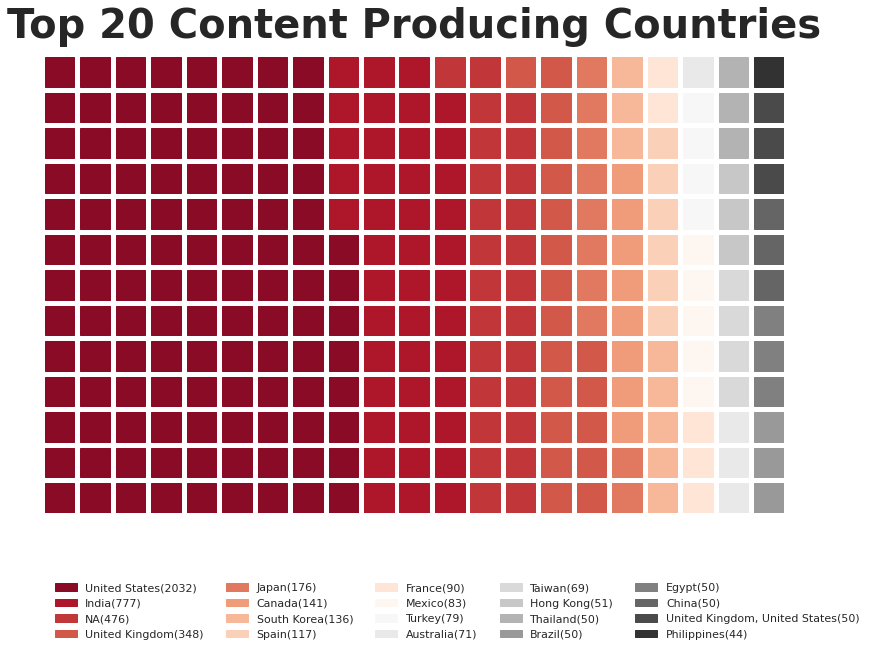

In [181]:
from pywaffle import Waffle

fig = plt.figure(
    FigureClass = Waffle,
    rows = 13,
    columns = 21,
    values = netflix['country'].value_counts()[:20],
    labels = ["{}({})".format(a, b) for a,b in zip(netflix['country'].value_counts().index[:20], netflix['country'].value_counts()[:20])],
    colors = sns.color_palette("RdGy", n_colors=20),
    legend = {'loc':'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(y)//4, 'framealpha': 0},
    font_size = 15,
    figsize=(12, 12),
    icon_legend = True
)

plt.title('Top 20 Content Producing Countries', position = (0.5, 1.0+0.03), fontsize=40, fontweight='bold')
plt.show()

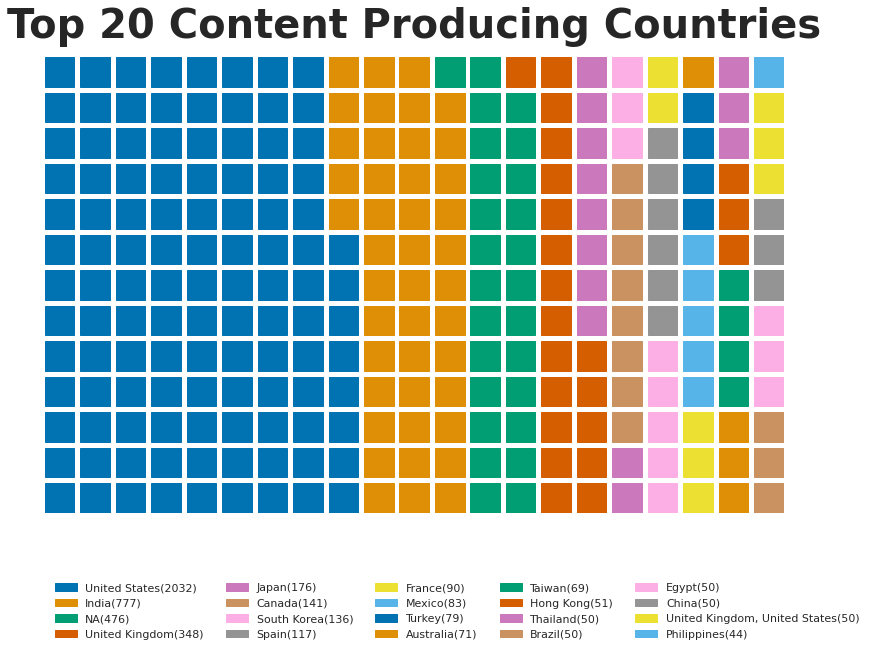

In [182]:
fig = plt.figure(
    FigureClass = Waffle,
    rows = 13,
    columns = 21,
    values = netflix['country'].value_counts()[:20],
    labels = ["{}({})".format(a, b) for a,b in zip(netflix['country'].value_counts().index[:20], netflix['country'].value_counts()[:20])],
    colors = sns.color_palette("colorblind", n_colors=20),
    legend = {'loc':'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(y)//4, 'framealpha': 0},
    font_size = 15,
    figsize=(12, 12),
    icon_legend = True
)

plt.title('Top 20 Content Producing Countries', position = (0.5, 1.0+0.03), fontsize=40, fontweight='bold')
plt.show()

# **RECOMMENDATIONS**

In [183]:
!pip install rake-nltk
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import time
from rake_nltk import Rake
import networkx as nx

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=3ddad181e8452389dcec0778b93b935e0b3c488f0b6d3001bf545bf7764de513
  Stored in directory: /root/.cache/pip/wheels/7c/d9/8a/b8a9244fa89a07f288f9fe006aafc79d93fceb58496c29b606
Successfully built rake-nltk


In [184]:
df.head(20)

show_id     type                                              title  \
0   81145628    Movie            Norm of the North: King Sized Adventure   
1   80117401    Movie                         Jandino: Whatever it Takes   
2   70234439  TV Show                                 Transformers Prime   
3   80058654  TV Show                   Transformers: Robots in Disguise   
4   80125979    Movie                                       #realityhigh   
5   80163890  TV Show                                            Apaches   
6   70304989    Movie                                           Automata   
7   80164077    Movie                 Fabrizio Copano: Solo pienso en mi   
8   80117902  TV Show                                       Fire Chasers   
9   70304990    Movie                                        Good People   
10  80169755    Movie                        Joaquín Reyes: Una y no más   
11  70299204    Movie                            Kidnapping Mr. Heineken   
12  80182480    Movie                           Krish Trish and Baltiboy   
13  80182483    Movie           Krish Trish and Baltiboy: Battle of Wits   
14  80182596    Movie     Krish Trish and Baltiboy: Best Friends Forever   
15  80182482    Movie          Krish Trish and Baltiboy: Comics of India   
16  80182597    Movie  Krish Trish and Baltiboy: Oversmartness Never ...   
17  80182481    Movie                  Krish Trish and Baltiboy: Part II   
18  80182621    Movie       Krish Trish and Baltiboy: The Greatest Trick   
19  80057969    Movie                                               Love   

                           director  \
0          Richard Finn, Tim Maltby   
1                               NaN   
2                               NaN   
3                               NaN   
4                  Fernando Lebrija   
5                               NaN   
6                       Gabe Ibáñez   
7   Rodrigo Toro, Francisco Schultz   
8                               NaN   
9                 Henrik Ruben Genz   
10            José Miguel Contreras   
11                 Daniel Alfredson   
12                              NaN   
13      Munjal Shroff, Tilak Shetty   
14      Munjal Shroff, Tilak Shetty   
15                     Tilak Shetty   
16                     Tilak Shetty   
17                              NaN   
18      Munjal Shroff, Tilak Shetty   
19                       Gaspar Noé   

                                                 cast  \
0   Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                    Jandino Asporaat   
2   Peter Cullen, Sumalee Montano, Frank Welker, J...   
3   Will Friedle, Darren Criss, Constance Zimmer, ...   
4   Nesta Cooper, Kate Walsh, John Michael Higgins...   
5   Alberto Ammann, Eloy Azorín, Verónica Echegui,...   
6   Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                     Fabrizio Copano   
8                                                 NaN   
9   James Franco, Kate Hudson, Tom Wilkinson, Omar...   
10                                      Joaquín Reyes   
11  Jim Sturgess, Sam Worthington, Ryan Kwanten, A...   
12  Damandeep Singh Baggan, Smita Malhotra, Baba S...   
13  Damandeep Singh Baggan, Smita Malhotra, Baba S...   
14  Damandeep Singh Baggan, Smita Malhotra, Deepak...   
15  Damandeep Singh Baggan, Smita Malhotra, Baba S...   
16      Rishi Gambhir, Smita Malhotra, Deepak Chachra   
17  Damandeep Singh Baggan, Smita Malhotra, Baba S...   
18  Damandeep Singh Baggan, Smita Malhotra, Baba S...   
19  Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...   

                                              country         date_added  \
0            United States, India, South Korea, China  September 9, 2019   
1                                      United Kingdom  September 9, 2016   
2                                       United States  September 8, 2018   
3                                       United States  September 8, 2018   
4         

**Recommendations using CountVectorizer and Cosine Similarity and Rake()**

In [185]:
new_df = df[['title', 'director', 'cast', 'listed_in', 'description']]
new_df.head(10)

title                         director  \
0  Norm of the North: King Sized Adventure         Richard Finn, Tim Maltby   
1               Jandino: Whatever it Takes                              NaN   
2                       Transformers Prime                              NaN   
3         Transformers: Robots in Disguise                              NaN   
4                             #realityhigh                 Fernando Lebrija   
5                                  Apaches                              NaN   
6                                 Automata                      Gabe Ibáñez   
7       Fabrizio Copano: Solo pienso en mi  Rodrigo Toro, Francisco Schultz   
8                             Fire Chasers                              NaN   
9                              Good People                Henrik Ruben Genz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
5  Alberto Ammann, Eloy Azorín, Verónica Echegui,...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   
8                                                NaN   
9  James Franco, Kate Hudson, Tom Wilkinson, Omar...   

                                           listed_in  \
0                 Children & Family Movies, Comedies   
1                                    Stand-Up Comedy   
2                                           Kids' TV   
3                                           Kids' TV   
4                                           Comedies   
5  Crime TV Shows, International TV Shows, Spanis...   
6  International Movies, Sci-Fi & Fantasy, Thrillers   
7                                    Stand-Up Comedy   
8                    Docuseries, Science & Nature TV   
9                      Action & Adventure, Thrillers   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...  
5  A young journalist is forced into a life of cr...  
6  In a dystopian future, an insurance adjuster f...  
7  Fabrizio Copano takes audience participation t...  
8  As California's 2016 fire season rages, brave ...  
9  A struggling couple can't believe their luck w...

In [186]:
new_df.dropna(inplace=True)
blanks = []
col = ['title', 'director', 'cast', 'listed_in', 'description']
for i, col in new_df.iterrows():  # Iterate over DataFrame rows as (index, Series) pairs.
    if type(col)==str:            # avoid NaN values
        if col.isspace():         # test 'review' for white spaces
            blanks.append(i)      # add matching index numbers to the list
new_df.drop(blanks, inplace=True)
new_df.head(10)

title  \
0          Norm of the North: King Sized Adventure   
4                                     #realityhigh   
6                                         Automata   
7               Fabrizio Copano: Solo pienso en mi   
9                                      Good People   
10                     Joaquín Reyes: Una y no más   
11                         Kidnapping Mr. Heineken   
13        Krish Trish and Baltiboy: Battle of Wits   
14  Krish Trish and Baltiboy: Best Friends Forever   
15       Krish Trish and Baltiboy: Comics of India   

                           director  \
0          Richard Finn, Tim Maltby   
4                  Fernando Lebrija   
6                       Gabe Ibáñez   
7   Rodrigo Toro, Francisco Schultz   
9                 Henrik Ruben Genz   
10            José Miguel Contreras   
11                 Daniel Alfredson   
13      Munjal Shroff, Tilak Shetty   
14      Munjal Shroff, Tilak Shetty   
15                     Tilak Shetty   

                                                 cast  \
0   Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
4   Nesta Cooper, Kate Walsh, John Michael Higgins...   
6   Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                     Fabrizio Copano   
9   James Franco, Kate Hudson, Tom Wilkinson, Omar...   
10                                      Joaquín Reyes   
11  Jim Sturgess, Sam Worthington, Ryan Kwanten, A...   
13  Damandeep Singh Baggan, Smita Malhotra, Baba S...   
14  Damandeep Singh Baggan, Smita Malhotra, Deepak...   
15  Damandeep Singh Baggan, Smita Malhotra, Baba S...   

                                            listed_in  \
0                  Children & Family Movies, Comedies   
4                                            Comedies   
6   International Movies, Sci-Fi & Fantasy, Thrillers   
7                                     Stand-Up Comedy   
9                       Action & Adventure, Thrillers   
10                                    Stand-Up Comedy   
11   Action & Adventure, Dramas, International Movies   
13                           Children & Family Movies   
14                           Children & Family Movies   
15                           Children & Family Movies   

                                          description  
0   Before planning an awesome wedding for his gra...  
4   When nerdy high schooler Dani finally attracts...  
6   In a dystopian future, an insurance adjuster f...  
7   Fabrizio Copano takes audience participation t...  
9   A struggling couple can't believe their luck w...  
10  Comedian and celebrity impersonator Joaquín Re...  
11  When beer magnate Alfred "Freddy" Heineken is ...  
13  An artisan is cheated of his payment, a lion o...  
14  A cat, monkey and donkey team up to narrate fo...  
15  In three comic-strip-style tales, a boy tries ...

In [187]:
new_df['key_words'] = ''
for index, row in new_df.iterrows():
    description = row['description']
    
    # Rake => uses english stopwords from NLTK, discards all puctuations
    r = Rake()
    r.extract_keywords_from_text(description)
    
    # Creating dictionary => key-words -> keys, scores -> values
    key_words_dict_scores = r.get_word_degrees()
    
    # Assigning key-words to new column for corresponding movies
    row['key_words'] = list(key_words_dict_scores.keys())
    
new_df['key_words'].head()

0    [stolen, artifact, grandfather, polar, bear, k...
4    [longtime, crush, cross, hairs, lands, interes...
6    [tech, company, investigates, robot, killed, i...
7    [stand, next, level, sperm, banks, set, family...
9    [believe, recently, murdered, luck, apartment,...
Name: key_words, dtype: object

In [188]:
key_words_dict_scores

defaultdict(<function rake_nltk.rake.Rake._build_word_co_occurance_graph.<locals>.<lambda>()>,
            {'constant': 1,
             'mecnun': 4,
             'newborns': 1,
             'despite': 3,
             'unexpected': 3,
             'turns': 3,
             'destiny': 3,
             'brings': 3,
             'leyla': 4,
             'together': 2,
             'remains': 2,
             'years': 2,
             'later': 2,
             'zany': 2,
             'life': 2})

In [189]:
new_df.drop(columns=['description'], inplace=True)
new_df.head(10)

title  \
0          Norm of the North: King Sized Adventure   
4                                     #realityhigh   
6                                         Automata   
7               Fabrizio Copano: Solo pienso en mi   
9                                      Good People   
10                     Joaquín Reyes: Una y no más   
11                         Kidnapping Mr. Heineken   
13        Krish Trish and Baltiboy: Battle of Wits   
14  Krish Trish and Baltiboy: Best Friends Forever   
15       Krish Trish and Baltiboy: Comics of India   

                           director  \
0          Richard Finn, Tim Maltby   
4                  Fernando Lebrija   
6                       Gabe Ibáñez   
7   Rodrigo Toro, Francisco Schultz   
9                 Henrik Ruben Genz   
10            José Miguel Contreras   
11                 Daniel Alfredson   
13      Munjal Shroff, Tilak Shetty   
14      Munjal Shroff, Tilak Shetty   
15                     Tilak Shetty   

                                                 cast  \
0   Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
4   Nesta Cooper, Kate Walsh, John Michael Higgins...   
6   Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                     Fabrizio Copano   
9   James Franco, Kate Hudson, Tom Wilkinson, Omar...   
10                                      Joaquín Reyes   
11  Jim Sturgess, Sam Worthington, Ryan Kwanten, A...   
13  Damandeep Singh Baggan, Smita Malhotra, Baba S...   
14  Damandeep Singh Baggan, Smita Malhotra, Deepak...   
15  Damandeep Singh Baggan, Smita Malhotra, Baba S...   

                                            listed_in  \
0                  Children & Family Movies, Comedies   
4                                            Comedies   
6   International Movies, Sci-Fi & Fantasy, Thrillers   
7                                     Stand-Up Comedy   
9                       Action & Adventure, Thrillers   
10                                    Stand-Up Comedy   
11   Action & Adventure, Dramas, International Movies   
13                           Children & Family Movies   
14                           Children & Family Movies   
15                           Children & Family Movies   

                                            key_words  
0   [stolen, artifact, grandfather, polar, bear, k...  
4   [longtime, crush, cross, hairs, lands, interes...  
6   [tech, company, investigates, robot, killed, i...  
7   [stand, next, level, sperm, banks, set, family...  
9   [believe, recently, murdered, luck, apartment,...  
10  [buses, bathroom, habits, stories, royalty, ni...  
11  [heineken, 1983, history, largest, ransom, dem...  
13  [lion, cheated, justice, brother, throne, inhe...  
14  [donkey, team, friendship, monkey, northeast, ...  
15  [minister, released, captivity, strip, boy, tr...

In [190]:
new_df['cast'] = new_df['cast'].map(lambda x: x.split(',')[:3])
new_df['listed_in'] = new_df['listed_in'].map(lambda x: x.lower().split(','))
new_df['director'] = new_df['director'].map(lambda x: x.split(' '))

new_df.head(10)

title  \
0          Norm of the North: King Sized Adventure   
4                                     #realityhigh   
6                                         Automata   
7               Fabrizio Copano: Solo pienso en mi   
9                                      Good People   
10                     Joaquín Reyes: Una y no más   
11                         Kidnapping Mr. Heineken   
13        Krish Trish and Baltiboy: Battle of Wits   
14  Krish Trish and Baltiboy: Best Friends Forever   
15       Krish Trish and Baltiboy: Comics of India   

                                director  \
0          [Richard, Finn,, Tim, Maltby]   
4                    [Fernando, Lebrija]   
6                         [Gabe, Ibáñez]   
7   [Rodrigo, Toro,, Francisco, Schultz]   
9                  [Henrik, Ruben, Genz]   
10             [José, Miguel, Contreras]   
11                   [Daniel, Alfredson]   
13      [Munjal, Shroff,, Tilak, Shetty]   
14      [Munjal, Shroff,, Tilak, Shetty]   
15                       [Tilak, Shetty]   

                                                 cast  \
0        [Alan Marriott,  Andrew Toth,  Brian Dobson]   
4   [Nesta Cooper,  Kate Walsh,  John Michael Higg...   
6   [Antonio Banderas,  Dylan McDermott,  Melanie ...   
7                                   [Fabrizio Copano]   
9        [James Franco,  Kate Hudson,  Tom Wilkinson]   
10                                    [Joaquín Reyes]   
11    [Jim Sturgess,  Sam Worthington,  Ryan Kwanten]   
13  [Damandeep Singh Baggan,  Smita Malhotra,  Bab...   
14  [Damandeep Singh Baggan,  Smita Malhotra,  Dee...   
15  [Damandeep Singh Baggan,  Smita Malhotra,  Bab...   

                                            listed_in  \
0               [children & family movies,  comedies]   
4                                          [comedies]   
6   [international movies,  sci-fi & fantasy,  thr...   
7                                   [stand-up comedy]   
9                    [action & adventure,  thrillers]   
10                                  [stand-up comedy]   
11  [action & adventure,  dramas,  international m...   
13                         [children & family movies]   
14                         [children & family movies]   
15                         [children & family movies]   

                                            key_words  
0   [stolen, artifact, grandfather, polar, bear, k...  
4   [longtime, crush, cross, hairs, lands, interes...  
6   [tech, company, investigates, robot, killed, i...  
7   [stand, next, level, sperm, banks, set, family...  
9   [believe, recently, murdered, luck, apartment,...  
10  [buses, bathroom, habits, stories, royalty, ni...  
11  [heineken, 1983, history, largest, ransom, dem...  
13  [lion, cheated, justice, brother, throne, inhe...  
14  [donkey, team, friendship, monkey, northeast, ...  
15  [minister, released, captivity, strip, boy, tr...

In [191]:
new_df.iterrows()

<generator object DataFrame.iterrows at 0x7f7d3ed32450>

In [192]:
for index, row in new_df.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['director'] = ''.join(row['director']).lower()

new_df.head(10)

title  \
0          Norm of the North: King Sized Adventure   
4                                     #realityhigh   
6                                         Automata   
7               Fabrizio Copano: Solo pienso en mi   
9                                      Good People   
10                     Joaquín Reyes: Una y no más   
11                         Kidnapping Mr. Heineken   
13        Krish Trish and Baltiboy: Battle of Wits   
14  Krish Trish and Baltiboy: Best Friends Forever   
15       Krish Trish and Baltiboy: Comics of India   

                        director  \
0          richardfinn,timmaltby   
4                fernandolebrija   
6                     gabeibáñez   
7   rodrigotoro,franciscoschultz   
9                henrikrubengenz   
10           josémiguelcontreras   
11               danielalfredson   
13      munjalshroff,tilakshetty   
14      munjalshroff,tilakshetty   
15                   tilakshetty   

                                                 cast  \
0             [alanmarriott, andrewtoth, briandobson]   
4        [nestacooper, katewalsh, johnmichaelhiggins]   
6   [antoniobanderas, dylanmcdermott, melaniegriff...   
7                                    [fabriziocopano]   
9             [jamesfranco, katehudson, tomwilkinson]   
10                                     [joaquínreyes]   
11         [jimsturgess, samworthington, ryankwanten]   
13  [damandeepsinghbaggan, smitamalhotra, babasehgal]   
14  [damandeepsinghbaggan, smitamalhotra, deepakch...   
15  [damandeepsinghbaggan, smitamalhotra, babasehgal]   

                                            listed_in  \
0               [children & family movies,  comedies]   
4                                          [comedies]   
6   [international movies,  sci-fi & fantasy,  thr...   
7                                   [stand-up comedy]   
9                    [action & adventure,  thrillers]   
10                                  [stand-up comedy]   
11  [action & adventure,  dramas,  international m...   
13                         [children & family movies]   
14                         [children & family movies]   
15                         [children & family movies]   

                                            key_words  
0   [stolen, artifact, grandfather, polar, bear, k...  
4   [longtime, crush, cross, hairs, lands, interes...  
6   [tech, company, investigates, robot, killed, i...  
7   [stand, next, level, sperm, banks, set, family...  
9   [believe, recently, murdered, luck, apartment,...  
10  [buses, bathroom, habits, stories, royalty, ni...  
11  [heineken, 1983, history, largest, ransom, dem...  
13  [lion, cheated, justice, brother, throne, inhe...  
14  [donkey, team, friendship, monkey, northeast, ...  
15  [minister, released, captivity, strip, boy, tr...

In [193]:
new_df['bag_of_words'] = ''
columns = new_df.columns
for index, row in new_df.iterrows():
    words = ''
    for col in columns:
        if col!= 'director':
            words += ''.join(row[col]) + ' '
        else:
            words += row[col] + ' '
    row['bag_of_words'] = words
    
new_df.head()

title                      director  \
0  Norm of the North: King Sized Adventure         richardfinn,timmaltby   
4                             #realityhigh               fernandolebrija   
6                                 Automata                    gabeibáñez   
7       Fabrizio Copano: Solo pienso en mi  rodrigotoro,franciscoschultz   
9                              Good People               henrikrubengenz   

                                                cast  \
0            [alanmarriott, andrewtoth, briandobson]   
4       [nestacooper, katewalsh, johnmichaelhiggins]   
6  [antoniobanderas, dylanmcdermott, melaniegriff...   
7                                   [fabriziocopano]   
9            [jamesfranco, katehudson, tomwilkinson]   

                                           listed_in  \
0              [children & family movies,  comedies]   
4                                         [comedies]   
6  [international movies,  sci-fi & fantasy,  thr...   
7                                  [stand-up comedy]   
9                   [action & adventure,  thrillers]   

                                           key_words  \
0  [stolen, artifact, grandfather, polar, bear, k...   
4  [longtime, crush, cross, hairs, lands, interes...   
6  [tech, company, investigates, robot, killed, i...   
7  [stand, next, level, sperm, banks, set, family...   
9  [believe, recently, murdered, luck, apartment,...   

                                        bag_of_words  
0  Norm of the North: King Sized Adventure richar...  
4  #realityhigh fernandolebrija nestacooperkatewa...  
6  Automata gabeibáñez antoniobanderasdylanmcderm...  
7  Fabrizio Copano: Solo pienso en mi rodrigotoro...  
9  Good People henrikrubengenz jamesfrancokatehud...

In [194]:
new_df.set_index('title', inplace=True)
new_df.head()

director  \
title                                                                   
Norm of the North: King Sized Adventure         richardfinn,timmaltby   
#realityhigh                                          fernandolebrija   
Automata                                                   gabeibáñez   
Fabrizio Copano: Solo pienso en mi       rodrigotoro,franciscoschultz   
Good People                                           henrikrubengenz   

                                                                                      cast  \
title                                                                                        
Norm of the North: King Sized Adventure            [alanmarriott, andrewtoth, briandobson]   
#realityhigh                                  [nestacooper, katewalsh, johnmichaelhiggins]   
Automata                                 [antoniobanderas, dylanmcdermott, melaniegriff...   
Fabrizio Copano: Solo pienso en mi                                        [fabriziocopano]   
Good People                                        [jamesfranco, katehudson, tomwilkinson]   

                                                                                 listed_in  \
title                                                                                        
Norm of the North: King Sized Adventure              [children & family movies,  comedies]   
#realityhigh                                                                    [comedies]   
Automata                                 [international movies,  sci-fi & fantasy,  thr...   
Fabrizio Copano: Solo pienso en mi                                       [stand-up comedy]   
Good People                                               [action & adventure,  thrillers]   

                                                                                 key_words  \
title                                                                                        
Norm of the North: King Sized Adventure  [stolen, artifact, grandfather, polar, bear, k...   
#realityhigh                             [longtime, crush, cross, hairs, lands, interes...   
Automata                                 [tech, company, investigates, robot, killed, i...   
Fabrizio Copano: Solo pienso en mi       [stand, next, level, sperm, banks, set, family...   
Good People                              [believe, recently, murdered, luck, apartment,...   

                                                                              bag_of_words  
title                                                                                       
Norm of the North: King Sized Adventure  Norm of the North: King Sized Adventure richar...  
#realityhigh                             #realityhigh fernandolebrija nestacooperkatewa...  
Automata                                 Automata gabeibáñez antoniobanderasdylanmcderm...  
Fabrizio Copano: Solo pienso en mi       Fabrizio Copano: Solo pienso en mi rodrigotoro...  
Good People                              Good People henrikrubengenz jamesfrancokatehud...

In [195]:
count = CountVectorizer()
count_matrix = count.fit_transform(new_df['bag_of_words'])
count_matrix

<3909x16936 sparse matrix of type '<class 'numpy.int64'>'
	with 38428 stored elements in Compressed Sparse Row format>

In [196]:
indices = pd.Series(new_df.index)
indices

0       Norm of the North: King Sized Adventure
1                                  #realityhigh
2                                      Automata
3            Fabrizio Copano: Solo pienso en mi
4                                   Good People
                         ...                   
3904              The Great British Baking Show
3905    Miraculous: Tales of Ladybug & Cat Noir
3906                               Sacred Games
3907                           Men on a Mission
3908                           Leyla and Mecnun
Name: title, Length: 3909, dtype: object

In [197]:
cosine = cosine_similarity(count_matrix, count_matrix)
cosine

array([[1.        , 0.11547005, 0.08164966, ..., 0.        , 0.        ,
        0.05504819],
       [0.11547005, 1.        , 0.        , ..., 0.        , 0.        ,
        0.09534626],
       [0.08164966, 0.        , 1.        , ..., 0.06741999, 0.05872202,
        0.06741999],
       ...,
       [0.        , 0.        , 0.06741999, ..., 1.        , 0.51467493,
        0.63636364],
       [0.        , 0.        , 0.05872202, ..., 0.51467493, 1.        ,
        0.51467493],
       [0.05504819, 0.09534626, 0.06741999, ..., 0.63636364, 0.51467493,
        1.        ]])

In [198]:
def recommendations(Title, cosine_sim = cosine):
    recommended = []
    idx = indices[indices==Title].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    top_10_indices = list(score_series.iloc[1:11].index)
    
    for i in top_10_indices:
        recommended.append(list(new_df.index)[i])
    return recommended

recommendations('3 Idiots')

['PK',
 'Sanju',
 'Bangistan',
 'Singapore',
 '2 States',
 'Zero',
 'Manmadhudu 2',
 'Laatu',
 'Bombairiya',
 'Janaan']

In [199]:
recommendations('Naruto')

['A.I.C.O.',
 'Devilman Crybaby',
 'Kuromukuro',
 'Girls und Panzer',
 'Fullmetal Alchemist: Brotherhood',
 'London Spy',
 'Criminal: Spain',
 'Velvet',
 'Justice',
 'Innocent']

In [200]:
recommendations('Brother')

['My Brother ... Nikhil',
 'Shanghai',
 'ROMA',
 'Michael',
 'Rukh',
 'Moor',
 'Umrika',
 'Saawan',
 'Phullu',
 'I Am']

In [201]:
recommendations('Hellboy')

['The Crow',
 'District 9',
 '9',
 'Bleach',
 'Legion',
 'Waarrior Savitri',
 'Iceman',
 'Cloverfield',
 'Kill Command',
 'Inkheart']

**Recommendations using TfidVectorizer and Cosine Similarity**

In [202]:
new_df = df
# Removing Stopwords
tfidf = TfidfVectorizer(stop_words='english')
new_df['description'] = new_df['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(new_df['description'])
tfidf_matrix.shape

(6234, 16151)

In [203]:
# There are 16151 words described for 6234 movies

tfidf_matrix

<6234x16151 sparse matrix of type '<class 'numpy.float64'>'
	with 85759 stored elements in Compressed Sparse Row format>

In [204]:
# Compute Linear Kernel between tfidf_matrix and itself
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [205]:
indices = pd.Series(new_df.index, index=new_df['title'])
indices

title
Norm of the North: King Sized Adventure           0
Jandino: Whatever it Takes                        1
Transformers Prime                                2
Transformers: Robots in Disguise                  3
#realityhigh                                      4
                                               ... 
Red vs. Blue                                   6229
Maron                                          6230
Little Baby Bum: Nursery Rhyme Friends         6231
A Young Doctor's Notebook and Other Stories    6232
Friends                                        6233
Length: 6234, dtype: int64

In [206]:
indices = indices.drop_duplicates()
indices

title
Norm of the North: King Sized Adventure           0
Jandino: Whatever it Takes                        1
Transformers Prime                                2
Transformers: Robots in Disguise                  3
#realityhigh                                      4
                                               ... 
Red vs. Blue                                   6229
Maron                                          6230
Little Baby Bum: Nursery Rhyme Friends         6231
A Young Doctor's Notebook and Other Stories    6232
Friends                                        6233
Length: 6234, dtype: int64

In [207]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:11]
    movie_indices = [i[0] for i in similarity_scores]
    return new_df['title'].iloc[movie_indices]

get_recommendations('3 Idiots')

789                         College Romance
793                       Engineering Girls
6209                              Mr. Young
1204    100 Things to do Before High School
5272                              Candy Jar
3199                                 Pahuna
966                              Be with Me
623                             Moms at War
2454                         Best Neighbors
1765                               Lovesong
Name: title, dtype: object

# **Adamic Adar measure**

It is a measure used to compute the closeness of nodes based on their shared neighbors.

* x and y are 2 nodes (2 Movies)
* N(one_node) is a function that return the set of adjacent nodes to one_node

adamicAdar(x,y)=∑u∈N(x)∩N(y)1log(N(u))
 
«say otherwise, for each node u in common to x and y, add to the measure 1/log(N(u))»

The quantity  1/log(N(u))  determine the importance of u in the measure.

* if x and y share a node u that has a lot of adjacent nodes, this node is not really relevant. → N(u) is high → 1/log(N(u)) is not high
* if x and y share a node u that not has a lot of adjacent nodes, this node is really relevant. → N(u) is not high → 1/log(N(u)) is higher

In [208]:
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09          2019   
1                            United Kingdom 2016-09-09          2016   
2                             United States 2018-09-08          2013   
3                             United States 2018-09-08          2016   
4                             United States 2017-09-08          2017   

     rating duration                           listed_in  \
0     TV-PG       90  Children & Family Movies, Comedies   
1     TV-MA       94                     Stand-Up Comedy   
2  TV-Y7-FV                                     Kids' TV   
3     TV-Y7                                     Kids' TV   
4     TV-14       99                            Comedies   

                                         description release_month  \
0  Before planning an awesome wedding for his gra...     September   
1  Jandino Asporaat riffs on the challenges of ra...     September   
2  With the help of three human allies, the Autob...     September   
3  When a prison ship crash unleashes hundreds of...     September   
4  When nerdy high schooler Dani finally attracts...     September   

   year_added  month_added season_count  length  
0      2019.0          9.0                  140  
1      2016.0          9.0                  145  
2      2018.0          9.0            1     140  
3      2018.0          9.0            1     126  
4      2017.0          9.0                  148

In [209]:
netflix['day'] = netflix['date_added'].dt.day
netflix['directors'] = netflix['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
netflix['categories'] = netflix['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
netflix['actors'] = netflix['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
netflix['countries'] = netflix['country']. apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09          2019   
1                            United Kingdom 2016-09-09          2016   
2                             United States 2018-09-08          2013   
3                             United States 2018-09-08          2016   
4                             United States 2017-09-08          2017   

     rating duration  ... release_month year_added month_added  season_count  \
0     TV-PG       90  ...     September     2019.0         9.0                 
1     TV-MA       94  ...     September     2016.0         9.0                 
2  TV-Y7-FV           ...     September     2018.0         9.0             1   
3     TV-Y7           ...     September     2018.0         9.0             1   
4     TV-14       99  ...     September     2017.0         9.0                 

   length  day                   directors  \
0     140  9.0  [Richard Finn, Tim Maltby]   
1     145  9.0                          []   
2     140  8.0                          []   
3     126  8.0                          []   
4     148  8.0          [Fernando Lebrija]   

                             categories  \
0  [Children & Family Movies, Comedies]   
1                     [Stand-Up Comedy]   
2                            [Kids' TV]   
3                            [Kids' TV]   
4                            [Comedies]   

                                              actors  \
0  [Alan Marriott, Andrew Toth, Brian Dobson, Col...   
1                                 [Jandino Asporaat]   
2  [Peter Cullen, Sumalee Montano, Frank Welker, ...   
3  [Will Friedle, Darren Criss, Constance Zimmer,...   
4  [Nesta Cooper, Kate Walsh, John Michael Higgin...   

                                    countries  
0  [United States, India, South Korea, China]  
1                            [United Kingdom]  
2                             [United States]  
3                             [United States]  
4                             [United States]  

[5 rows x 22 columns]

In [210]:
netflix.shape

(6234, 22)

# **K Means Clustering with TF-IDF**

In [211]:
start_time = time.time()
text_content = netflix['description']
vector = TfidfVectorizer(max_df = 0.4,           # drop words that occur more than max_df %
                         stop_words = 'english', # remove stop words
                         lowercase = True,       # everything to lowercase
                         use_idf = True,
                         norm = u'l2',
                         smooth_idf = True       # prevent divide by zero errors
                         )

tfidf = vector.fit_transform(text_content)

In [212]:
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centres = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vector.get_feature_names()

request_transform = vector.transform(netflix['description'])
netflix['cluster'] = kmeans.predict(request_transform)
netflix['cluster'].value_counts().head()

43     5876
42       77
144       9
119       7
56        6
Name: cluster, dtype: int64

In [213]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i!=index]
    return [index for index in related_docs_indices][0:top_n]

In [214]:
G = nx.Graph(label="MOVIE")
start_time = time.time()
for i, row in netflix.iterrows():
    if(i%1000==0):
        print(" iter {} -- {} seconds --".format(i, time.time()-start_time))
    G.add_node(row['title'], key=row['show_id'], label='MOVIE', mtype=row['type'], rating=row['rating'])
    for element in row['actors']:
        G.add_node(element, label='PERSON')
        G.add_edge(row['title'], element, label='ACTED_IN')
    for element in row['categories']:
        G.add_node(element, label='CAT')
        G.add_edge(row['title'], element, label='CAT_IN')
    for element in row['directors']:
        G.add_node(element, label='PERSON')
        G.add_edge(row['title'], element, label='DIRECTED')
    for element in row['countries']:
        G.add_node(element, label='COU')
        G.add_edge(row['title'], element, label='COU_IN')
        
    indices = find_similar(tfidf, i, top_n=5)
    snode = "Sim("+row['title'][:15].strip()+")"
    G.add_node(snode, label='SIMILAR')
    G.add_edge(row['title'], snode, label='SIMILARITY')
    for element in indices:
        G.add_edge(snode, netflix['title'].loc[element], label='SIMILARITY')
print(" finish -- {} seconds --".format(time.time() - start_time))

 iter 0 -- 0.032933950424194336 seconds --
 iter 1000 -- 4.972593545913696 seconds --
 iter 2000 -- 9.813610553741455 seconds --
 iter 3000 -- 14.67524766921997 seconds --
 iter 4000 -- 19.426847457885742 seconds --
 iter 5000 -- 24.275744199752808 seconds --
 iter 6000 -- 29.192566394805908 seconds --
 finish -- 30.348255395889282 seconds --


In [215]:
indices

[5659, 5987, 20, 3923, 5830]

In [216]:
def get_all_adj_nodes(list_in):
    sub_graph = set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):
            sub_graph.add(e)
    return list(sub_graph)

In [217]:
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors = []
    for e in subgraph.nodes():
        if G.nodes[e]['label'] == 'MOVIE':
            colors.append('blue')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('red')
        elif G.nodes[e]['label']=="CAT":
            colors.append('green')
        elif G.nodes[e]['label']=="COU":
            colors.append('yellow')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('orange')    
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('orange')
    nx.draw(subgraph, with_labels=True, font_weight='bold', node_color=colors)
    plt.show()

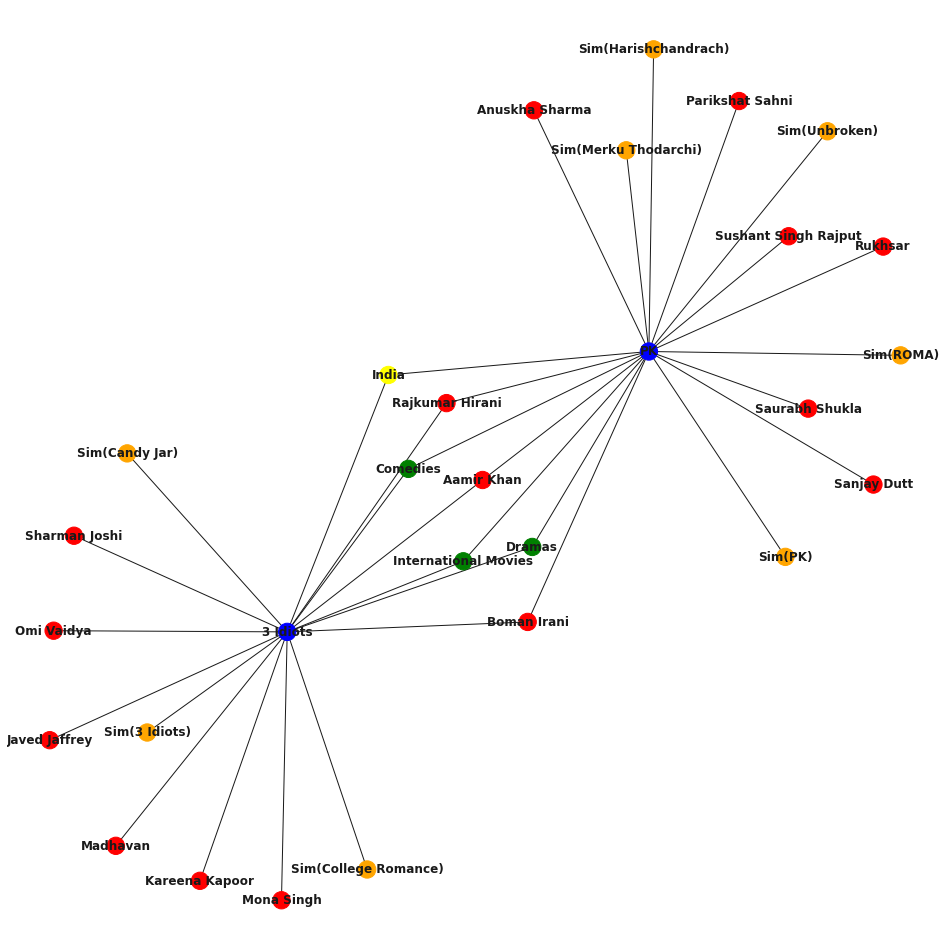

In [218]:
list_in = ['3 Idiots', 'PK']
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [219]:
def get_recommendations(root):
    common_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=='MOVIE':
                commons = common_dict.get(e2)
                if commons==None:
                    common_dict.update({e2: [e]}) 
                else:
                    commons.append(e)
                    common_dict.update({e2: commons})
    movies = []
    weight = []
    for key,values in common_dict.items():
        w = 0.0
        for e in values:
            w+=1/math.log(G.degree(e))
        movies.append(key)
        weight.append(w)
        
    result = pd.Series(data=np.array(weight), index=movies)
    result.sort_values(inplace=True, ascending=False)
    return result

In [220]:
result = get_recommendations('3 Idiots')
result

PK                                   2.167002
Rang De Basanti                      1.764278
Sanju                                1.645505
War Chhod Na Yaar                    1.553708
Zed Plus                             1.469150
                                       ...   
District 9                           0.132283
Virunga                              0.132283
My Way                               0.132283
Yes or No 2.5                        0.132283
Ayotzinapa, el paso de la tortuga    0.132283
Length: 3004, dtype: float64

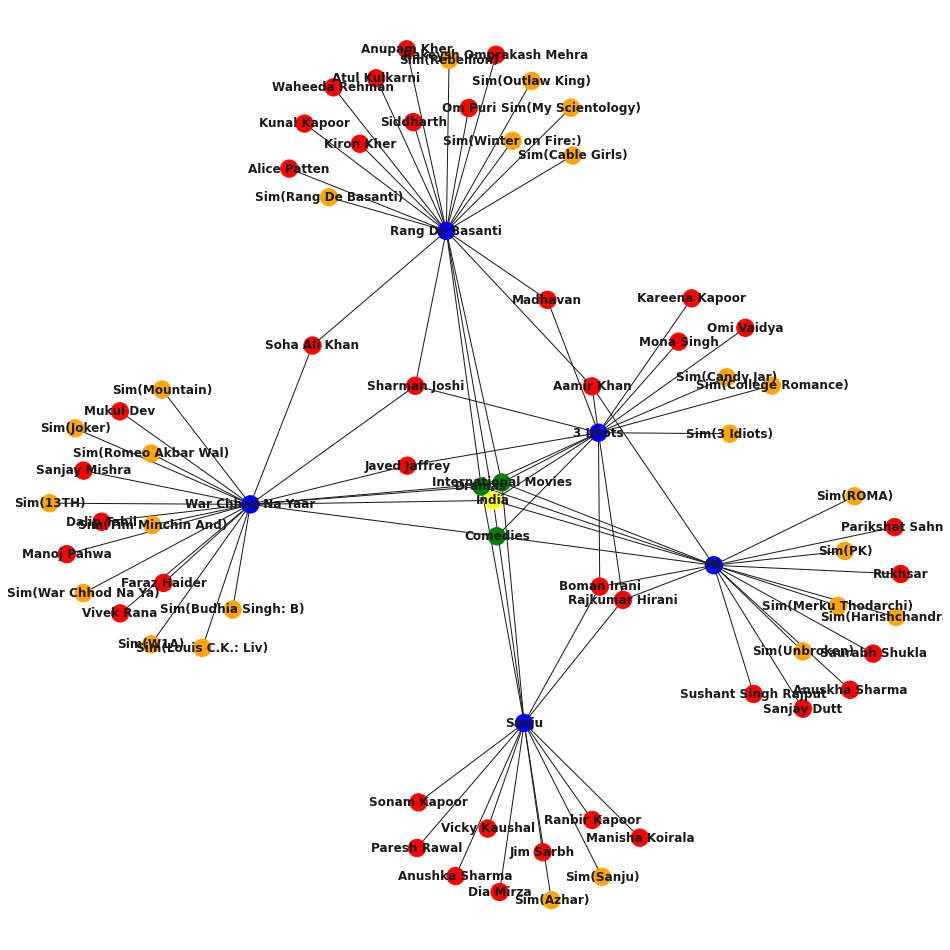

In [221]:
reco = list(result.index[:4].values)
reco.extend(['3 Idiots'])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)